In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"] = 10,6

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.graphics.tsaplots as sgt

import warnings
warnings.filterwarnings('ignore')

In [50]:
bitcoin = pd.read_csv("bitcoin_v2.csv", parse_dates =[0] )
bitcoin = bitcoin.drop('Unnamed: 0', axis=1)
bitcoin.head()

,date,confirmation_time,difficulty,hash_rate,market_cap,price_usd,total_block_size,total_miner_revenue,total_supply,total_trx_fees,trade_volume,transactions,trx_cost_percent,trx_per_block,trx_volume,unique_addresses,daily_return
0,2015-01-01,7.150000,4.064096e+10,335365.2901,4.317111e+09,315.70,27835.0,1312680.60,13674725.0,8.003076,5.553875e+06,58963,5.244721,555.0,79280.0,116012,0
1,2015-01-02,6.933333,4.064096e+10,323243.6531,4.324529e+09,316.15,27875.0,1267761.50,13678725.0,10.727695,6.440896e+06,72234,4.477312,627.0,89563.0,168563,0
2,2015-01-03,6.433333,4.064096e+10,331324.7444,4.136728e+09,302.33,27922.0,1242878.63,13682825.0,11.906088,2.938312e+07,82832,2.277049,734.0,180541.0,207571,0
3,2015-01-04,8.033333,4.064096e+10,335365.2901,3.708212e+09,270.93,27971.0,1129778.10,13686975.0,20.288107,5.310479e+07,85570,1.376066,692.0,303038.0,206228,0
4,2015-01-05,6.816667,4.064096e+10,339405.8358,3.789717e+09,276.80,28024.0,1166988.80,13691175.0,16.967084,3.132672e+07,93753,1.863192,751.0,226278.0,193982,1


In [51]:
bitcoin['date'] = bitcoin['date'].astype('datetime64[ns]')

In [4]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1093 non-null   datetime64[ns]
 1   confirmation_time    1093 non-null   float64       
 2   difficulty           1093 non-null   float64       
 3   hash_rate            1093 non-null   float64       
 4   market_cap           1093 non-null   float64       
 5   price_usd            1093 non-null   float64       
 6   total_block_size     1093 non-null   float64       
 7   total_miner_revenue  1093 non-null   float64       
 8   total_supply         1093 non-null   float64       
 9   total_trx_fees       1093 non-null   float64       
 10  trade_volume         1093 non-null   float64       
 11  transactions         1093 non-null   int64         
 12  trx_cost_percent     1093 non-null   float64       
 13  trx_per_block        1093 non-nul

In [52]:
bitcoin2 = bitcoin.copy()

In [244]:
#no indexing if using prophet
# bitcoin2.index = bitcoin2['date']
# del bitcoin2['date']

In [245]:
bitcoin2.head()

,date,confirmation_time,difficulty,hash_rate,market_cap,price_usd,total_block_size,total_miner_revenue,total_supply,total_trx_fees,trade_volume,transactions,trx_cost_percent,trx_per_block,trx_volume,unique_addresses,daily_return
0,2015-01-01,7.150000,4.064096e+10,335365.2901,4.317111e+09,315.70,27835.0,1312680.60,13674725.0,8.003076,5.553875e+06,58963,5.244721,555.0,79280.0,116012,0
1,2015-01-02,6.933333,4.064096e+10,323243.6531,4.324529e+09,316.15,27875.0,1267761.50,13678725.0,10.727695,6.440896e+06,72234,4.477312,627.0,89563.0,168563,0
2,2015-01-03,6.433333,4.064096e+10,331324.7444,4.136728e+09,302.33,27922.0,1242878.63,13682825.0,11.906088,2.938312e+07,82832,2.277049,734.0,180541.0,207571,0
3,2015-01-04,8.033333,4.064096e+10,335365.2901,3.708212e+09,270.93,27971.0,1129778.10,13686975.0,20.288107,5.310479e+07,85570,1.376066,692.0,303038.0,206228,0
4,2015-01-05,6.816667,4.064096e+10,339405.8358,3.789717e+09,276.80,28024.0,1166988.80,13691175.0,16.967084,3.132672e+07,93753,1.863192,751.0,226278.0,193982,1


In [246]:
bitcoin2.columns

Index(['date', 'confirmation_time', 'difficulty', 'hash_rate', 'market_cap',
       'price_usd', 'total_block_size', 'total_miner_revenue', 'total_supply',
       'total_trx_fees', 'trade_volume', 'transactions', 'trx_cost_percent',
       'trx_per_block', 'trx_volume', 'unique_addresses', 'daily_return'],
      dtype='object')

In [9]:
#print(bitcoin2.iloc[-5:, :5])

In [10]:
#print(bitcoin2.index)

In [11]:
#print(bitcoin2['2015'].iloc[:5,[12]])

In [12]:
#print(bitcoin2['2017-12'].iloc[:31,[12]])  to use this have to do indexing

# dropping all extra features (univariate analysis)

In [53]:
bitcoin2 = bitcoin2.drop(['confirmation_time', 'difficulty', 'hash_rate', 'market_cap',
       'total_block_size', 'total_miner_revenue', 'total_supply',
       'total_trx_fees', 'trade_volume', 'transactions', 'trx_cost_percent',
       'trx_per_block', 'trx_volume', 'unique_addresses', 'daily_return'], axis = 1)

In [7]:
bitcoin2.tail(31)

,date,price_usd
1062,2017-12-01,10883.91200
1063,2017-12-02,11071.36833
1064,2017-12-03,11332.62200
1065,2017-12-04,11584.83000
1066,2017-12-05,11878.43333
1067,2017-12-06,13540.98000
1068,2017-12-07,16501.97167
1069,2017-12-08,16007.43667
1070,2017-12-09,15142.83415
1071,2017-12-10,14869.80500


# Initial Plotting

<AxesSubplot:>

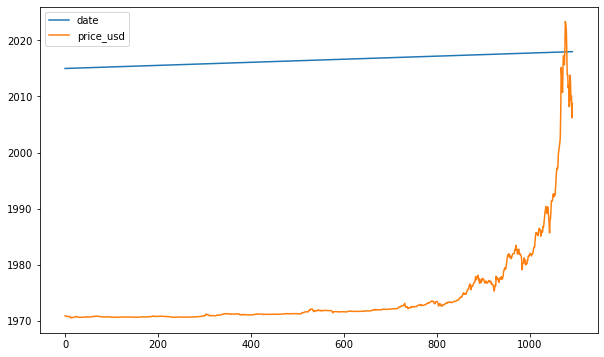

In [15]:
bitcoin2.plot()

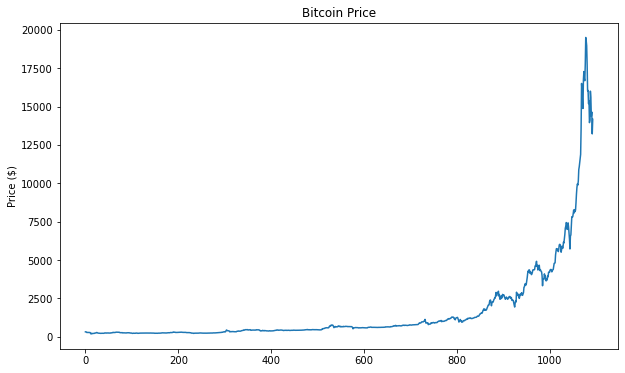

In [16]:
plt.plot(bitcoin2.index, bitcoin2['price_usd'])
plt.title('Bitcoin Price')
plt.ylabel('Price ($)');

plt.show();

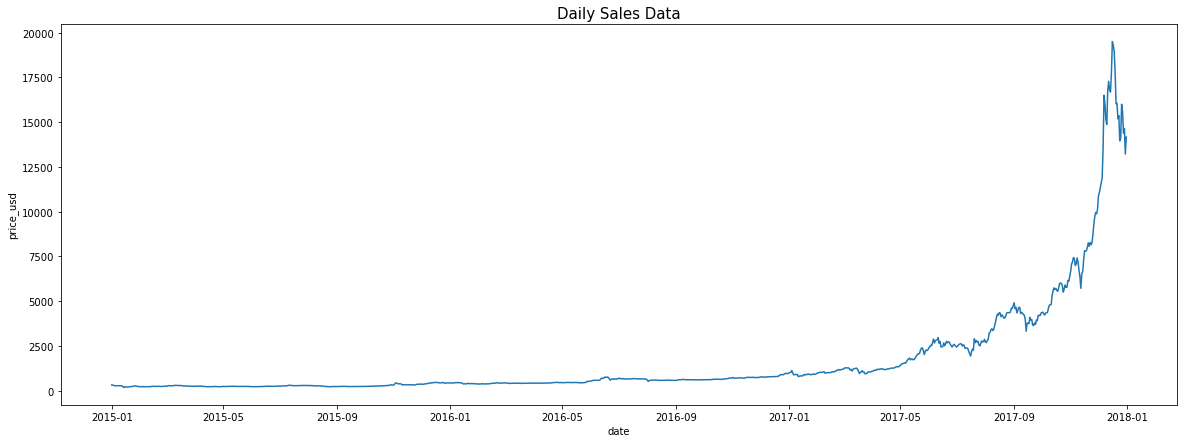

In [17]:
## Plot the Time series data
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="date", y="price_usd", data=bitcoin2)
a.set_title("Daily Sales Data",fontsize=15)
plt.show()

# We have trend, seasonality and autocorrelation in our data

# EDA

In [18]:
def date_features(df, label=None):
    df = bitcoin2.copy()

    df['date'] = df.date
    df['month'] = df['date'].dt.strftime('%B')
    df['year'] = df['date'].dt.strftime('%Y')
    df['dayofweek'] = df['date'].dt.strftime('%A')
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
X, y = date_features(bitcoin2, label='price_usd')
df_new = pd.concat([X, y], axis=1)
df_new.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,price_usd
0,Thursday,1,January,2015,1,1,1,315.70
1,Friday,1,January,2015,2,2,1,316.15
2,Saturday,1,January,2015,3,3,1,302.33
3,Sunday,1,January,2015,4,4,1,270.93
4,Monday,1,January,2015,5,5,2,276.80


# Plotting features to see trends

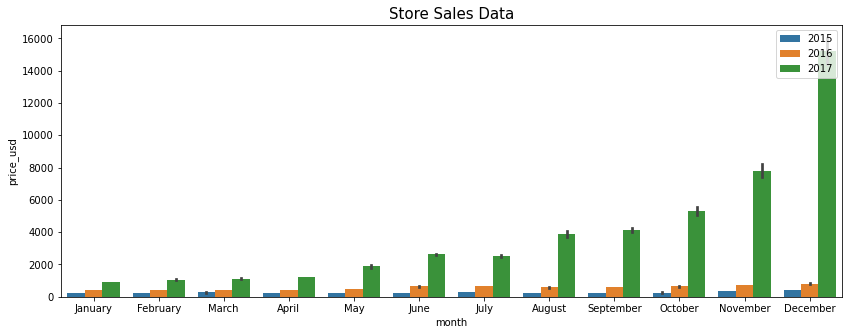

In [19]:
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="month", y="price_usd",hue = 'year',data=df_new)
a.set_title("Store Sales Data",fontsize=15)
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Total Sales received By year')

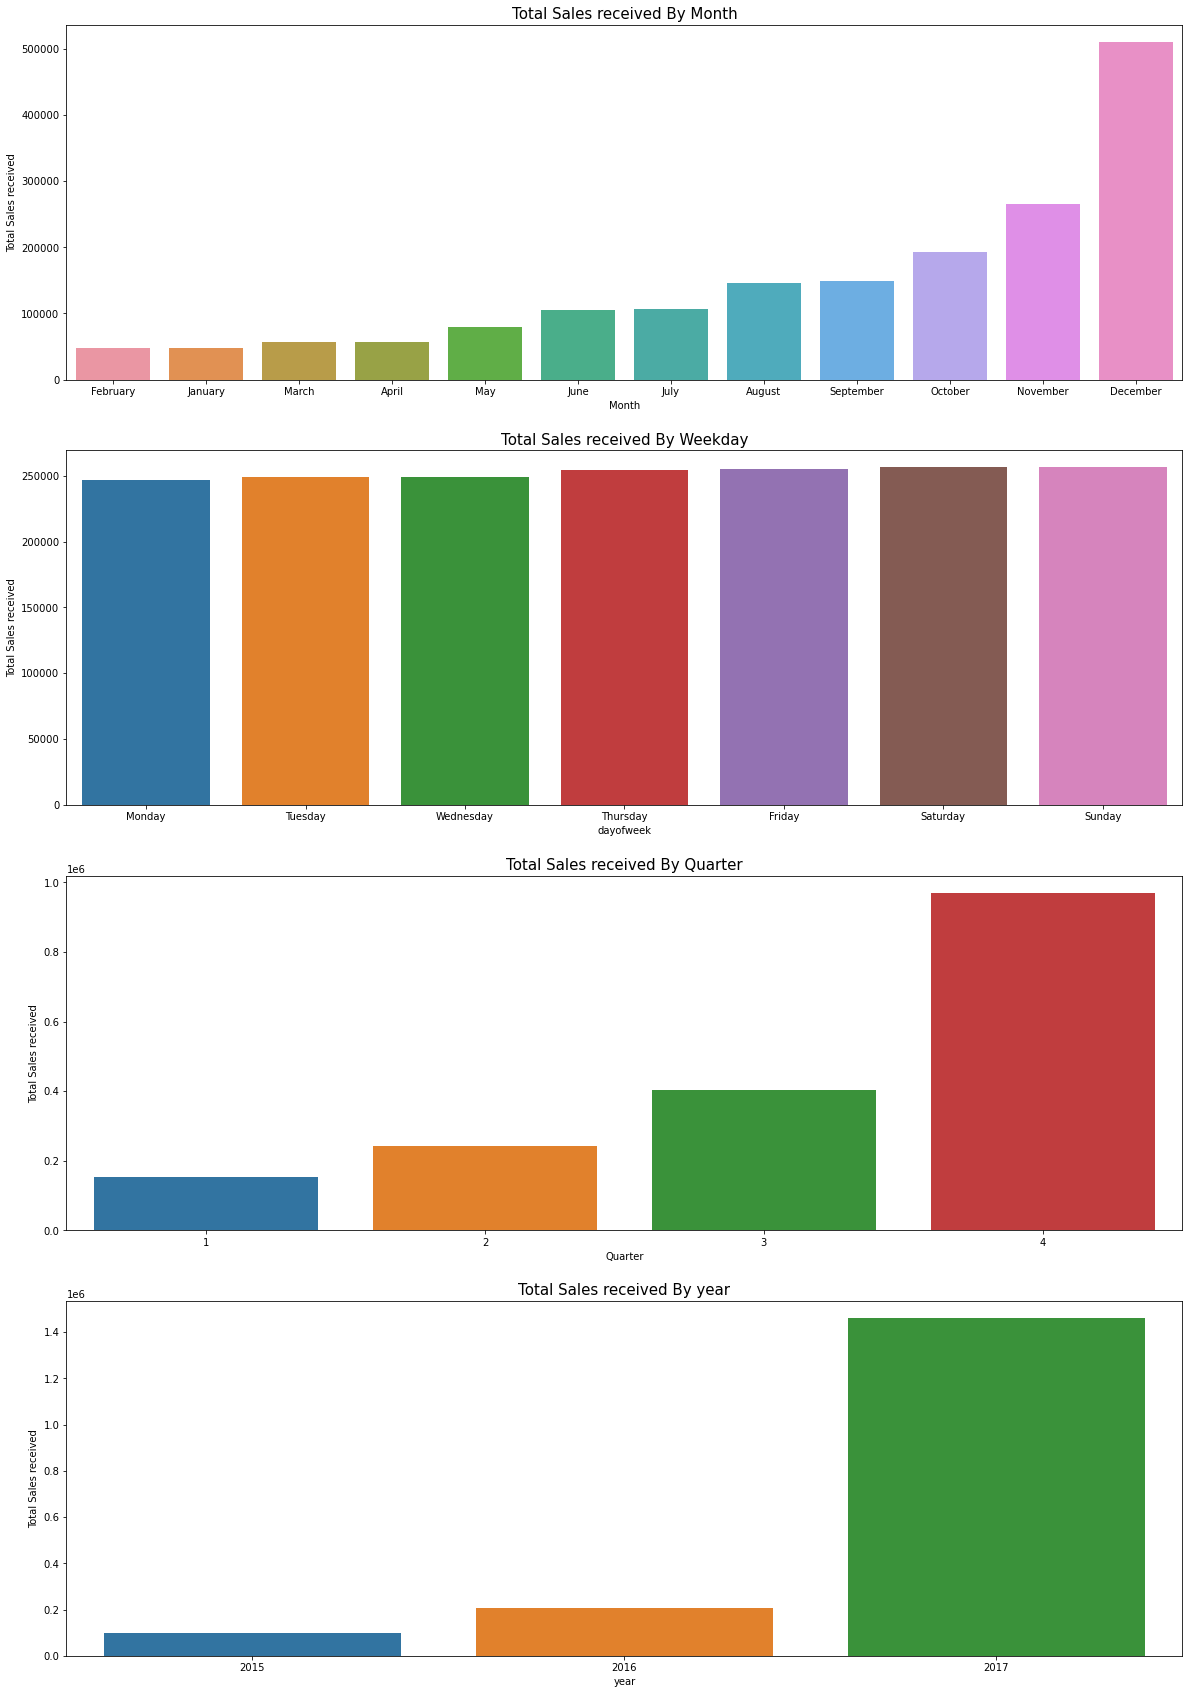

In [20]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,30)

monthAggregated = pd.DataFrame(df_new.groupby("month")["price_usd"].sum()).reset_index().sort_values('price_usd')
sns.barplot(data=monthAggregated,x="month",y="price_usd",ax=ax1)
ax1.set(xlabel='Month', ylabel='Total Sales received')
ax1.set_title("Total Sales received By Month",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("dayofweek")["price_usd"].sum()).reset_index().sort_values('price_usd')
sns.barplot(data=monthAggregated,x="dayofweek",y="price_usd",ax=ax2)
ax2.set(xlabel='dayofweek', ylabel='Total Sales received')
ax2.set_title("Total Sales received By Weekday",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("quarter")["price_usd"].sum()).reset_index().sort_values('price_usd')
sns.barplot(data=monthAggregated,x="quarter",y="price_usd",ax=ax3)
ax3.set(xlabel='Quarter', ylabel='Total Sales received')
ax3.set_title("Total Sales received By Quarter",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("year")["price_usd"].sum()).reset_index().sort_values('price_usd')
sns.barplot(data=monthAggregated,x="year",y="price_usd",ax=ax4)
ax4.set(xlabel='year', ylabel='Total Sales received')
ax4.set_title("Total Sales received By year",fontsize=15)

# Pre-process data for Prophet

In [21]:
bitcoin2.head()

,date,price_usd
0,2015-01-01,315.70
1,2015-01-02,316.15
2,2015-01-03,302.33
3,2015-01-04,270.93
4,2015-01-05,276.80


# Identifying index and rename column names

In [22]:
bitcoin3 = bitcoin2.rename(columns={'date': 'ds', 'price_usd': 'y'})

In [23]:
bitcoin3.head()

,ds,y
0,2015-01-01,315.70
1,2015-01-02,316.15
2,2015-01-03,302.33
3,2015-01-04,270.93
4,2015-01-05,276.80


In [24]:
bitcoin3.tail(61)

,ds,y
1032,2017-11-01,6665.306683
1033,2017-11-02,7068.020100
1034,2017-11-03,7197.720060
1035,2017-11-04,7437.543317
1036,2017-11-05,7377.012367
...,...,...
1088,2017-12-27,15589.321670
1089,2017-12-28,14380.581670
1090,2017-12-29,14640.140000
1091,2017-12-30,13215.574000


# New

# Splitting data into train & test

# train = 2015-01-01 + 2017-10-31 all but last 2 months to train
test = 2017-11-01 + 2017-12-31 last 2 months to test

In [25]:
end_date = '2017-10-31'
mask1 = (bitcoin3['ds'] <= end_date)
mask2 = (bitcoin3['ds'] > end_date)

In [26]:
X_tr = bitcoin3.loc[mask1]
X_tst =bitcoin3.loc[mask2]
print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (1032, 2)
test shape (61, 2)


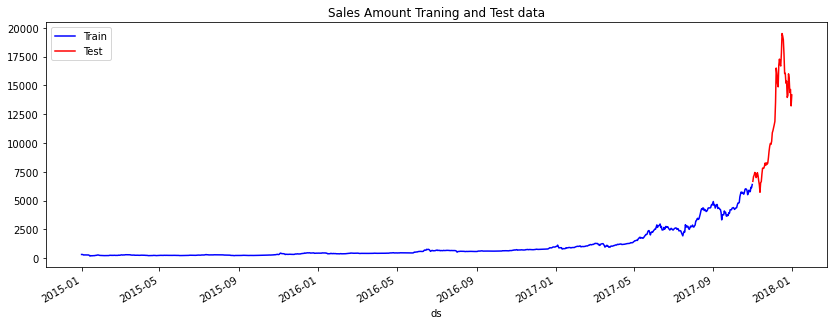

In [27]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Amount Traning and Test data')
plt.show()

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
# !pip install pystan
# !pip install fbprophet

# Prophet Model

In [36]:
#from prophet import Prophet

In [38]:
model = Prophet.Prophet()
model.fit(X_tr)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = model.make_future_dataframe(periods=57, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1082,2017-12-21,6760.832388,6526.952390,6988.611838
1083,2017-12-22,6782.466823,6543.535325,7015.375598
1084,2017-12-23,6810.787915,6559.942181,7026.369190
1085,2017-12-24,6836.311030,6591.487743,7060.234867
1086,2017-12-25,6866.081516,6630.660457,7096.876992
1087,2017-12-26,6891.258388,6650.276217,7129.568463
1088,2017-12-27,6904.716322,6672.470025,7129.485839


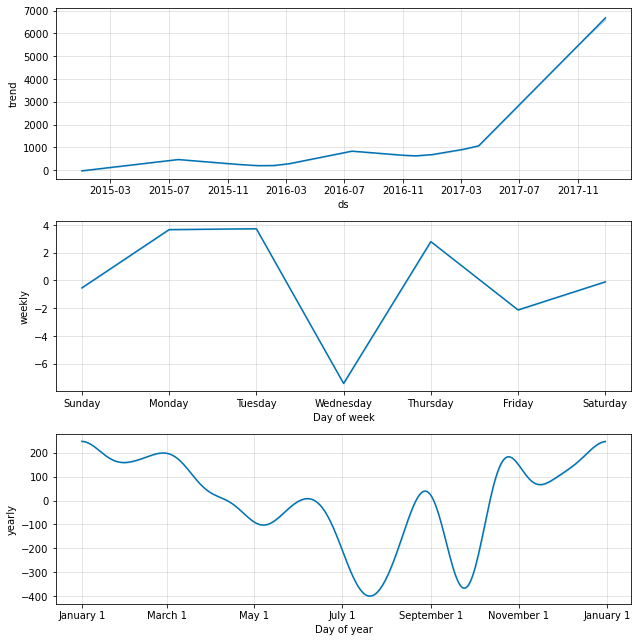

In [41]:
# Plot the components of the model
fig = model.plot_components(forecast)

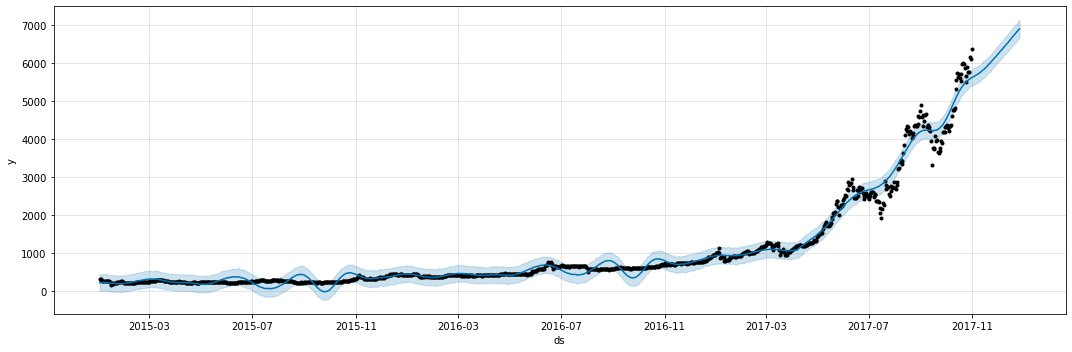

In [42]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,ax=ax)
plt.show()

# Actual vs. Prediction Comparison

In [43]:
X_tst_forecast = model.predict(X_tst)
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
54,2017-12-25,6866.081516,6622.689282,7080.297459
55,2017-12-26,6891.258388,6647.012057,7123.561750
56,2017-12-27,6904.716322,6668.217591,7131.165626
57,2017-12-28,6939.008174,6693.904781,7178.525915
58,2017-12-29,6957.556032,6718.076869,7180.824327
59,2017-12-30,6982.443235,6727.522665,7218.277714
60,2017-12-31,7004.227979,6755.112692,7233.417758


In [44]:
bitcoin3.tail()

,ds,y
1088,2017-12-27,15589.32167
1089,2017-12-28,14380.58167
1090,2017-12-29,14640.14000
1091,2017-12-30,13215.57400
1092,2017-12-31,14165.57500


# Actual y = 15589.32167
Predicted y = 6904.716322

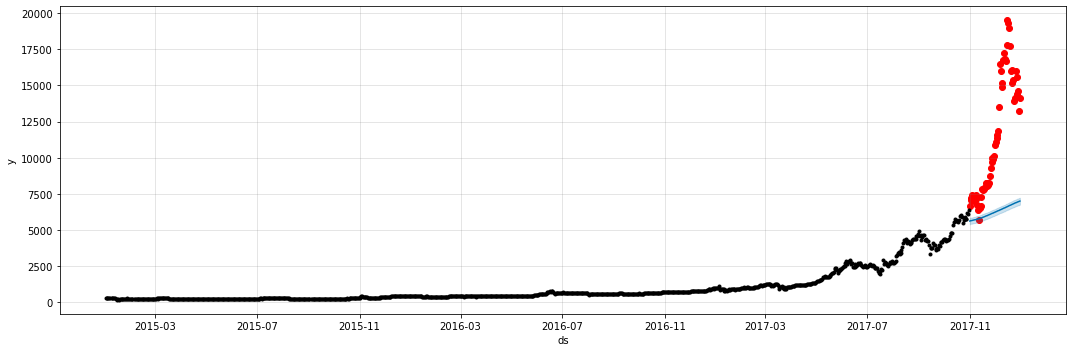

In [45]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(X_tst.ds, X_tst['y'], color='r')
fig = model.plot(X_tst_forecast, ax=ax)

# Compare the Actual Price & Forecasted Price

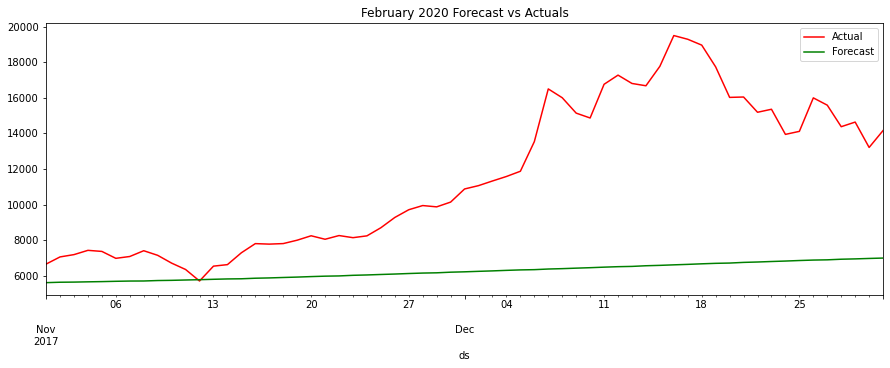

In [46]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('February 2020 Forecast vs Actuals')
plt.show()

# Need to tune the parameters

In [47]:
X_tst

,ds,y
1032,2017-11-01,6665.306683
1033,2017-11-02,7068.020100
1034,2017-11-03,7197.720060
1035,2017-11-04,7437.543317
1036,2017-11-05,7377.012367
...,...,...
1088,2017-12-27,15589.321670
1089,2017-12-28,14380.581670
1090,2017-12-29,14640.140000
1091,2017-12-30,13215.574000


In [51]:
import datetime as dt

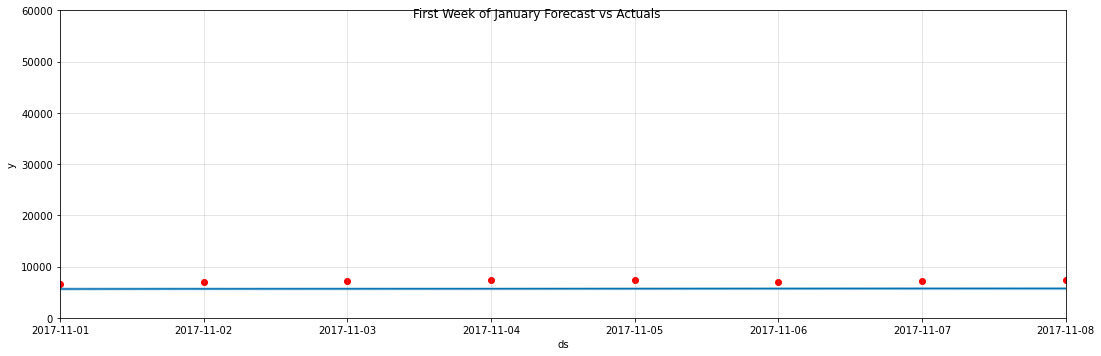

In [53]:
# Plot the forecast with the actuals

left  = dt.date(2017,11,1)
right = dt.date(2017,11,8)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(X_tst.ds, X_tst['y'], color='r')
fig = model.plot(X_tst_forecast, ax=ax)
ax.set_xbound(lower= left, upper= right)
ax.set_ylim(0, 60000)
plot = plt.suptitle('First Week of January Forecast vs Actuals')

In [54]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",round(mape,4))

MAPE 39.7232


# Adding holidays

In [55]:
#! pip install pymeeus

In [56]:
import holidays

In [57]:
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2018,2019,2020]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [58]:
holiday.head()

,ds,holiday
0,2018-01-01,US-Holidays
1,2018-01-15,US-Holidays
2,2018-02-19,US-Holidays
3,2018-05-28,US-Holidays
4,2018-07-04,US-Holidays


# Training with holiday

In [60]:
# Setup and train model with holidays
model_with_holidays = Prophet.Prophet(holidays=holiday, daily_seasonality = True,seasonality_mode='multiplicative',
                              interval_width=0.95 )
model_with_holidays.fit(X_tr)

In [61]:
future = model_with_holidays.make_future_dataframe(periods=57, freq='D')
forecast = model_with_holidays.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1082,2017-12-21,6009.580009,5511.430589,6512.302024
1083,2017-12-22,6018.661733,5552.721205,6561.463857
1084,2017-12-23,6061.884015,5560.522911,6575.461164
1085,2017-12-24,6083.963539,5569.509308,6618.205438
1086,2017-12-25,6119.872711,5610.744839,6685.150663
1087,2017-12-26,6108.909571,5545.693734,6740.549127
1088,2017-12-27,6059.498372,5505.902213,6596.234157


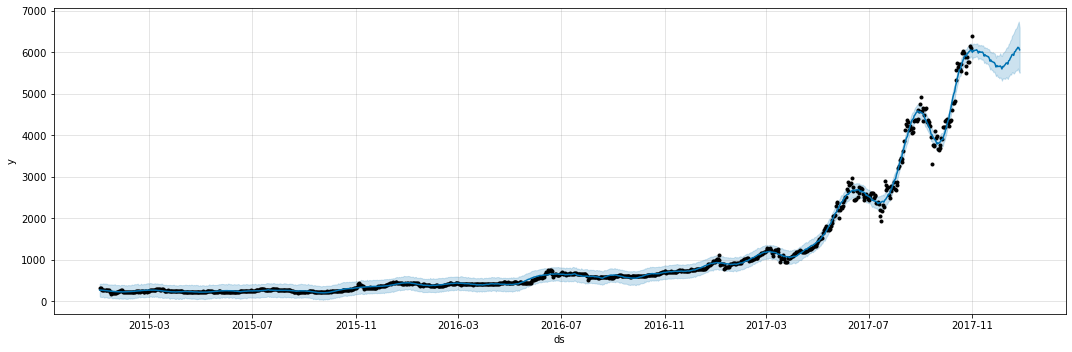

In [62]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_with_holidays.plot(forecast,ax=ax)
plt.show()

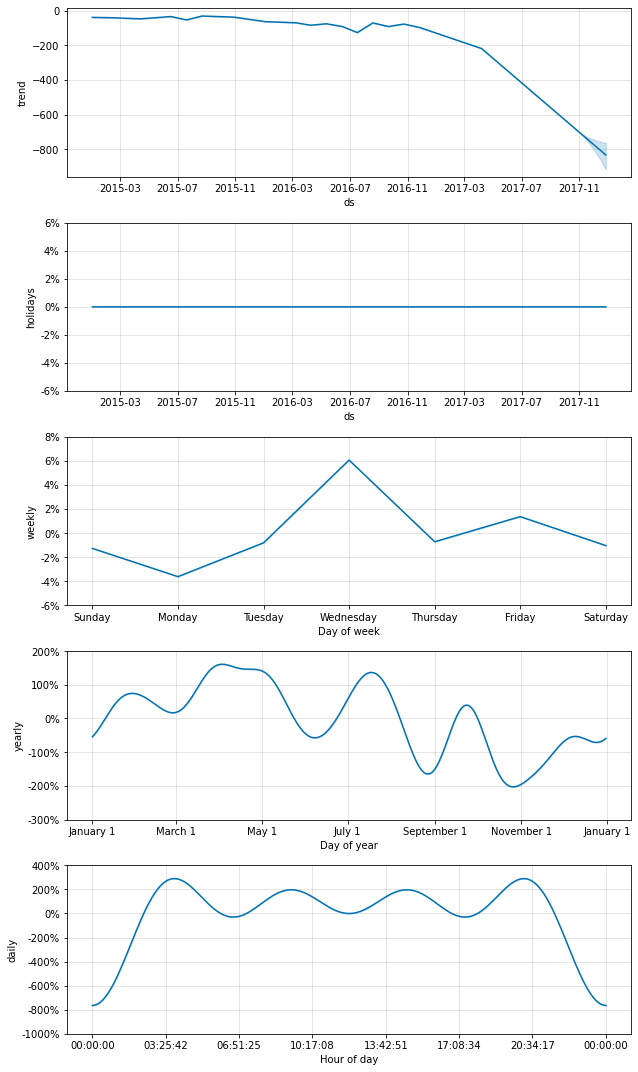

In [63]:
# Plot the components of the model
fig = model_with_holidays.plot_components(forecast)

In [64]:
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
54,2017-12-25,6119.872711,5617.598301,6671.386191
55,2017-12-26,6108.909571,5590.218900,6678.459011
56,2017-12-27,6059.498372,5530.647886,6640.683672
57,2017-12-28,6119.303390,5621.188952,6707.127031
58,2017-12-29,6100.263947,5562.805531,6713.226869
59,2017-12-30,6114.018557,5563.801662,6711.202948
60,2017-12-31,6104.711189,5530.478501,6752.137966


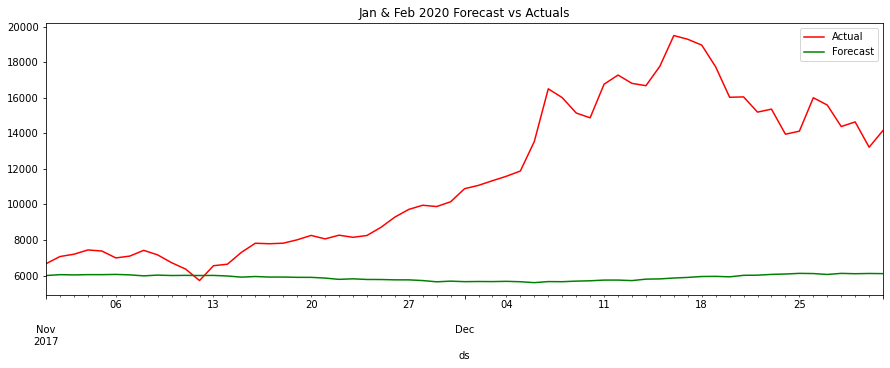

In [65]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()

In [66]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast_holiday['yhat'])
print("MAPE",round(mape,4))

MAPE 42.0129


# MAPE gets worse with adding holidays, so we need to add other parameters

# Further tunning of parameters which gives possible 150 models

In [67]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


# Prophet Model Tunning

# train = 2015-01-01 + 2017-10-31 all but last 2 months to train

test = 2017-11-01 + 2017-12-31 last 2 months to test


In [93]:
import random
strt='2017-11-01'
end='2017-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,daily_seasonality = True,yearly_seasonality = True,holidays=holiday, 
                         interval_width=0.95)
    
    train_model.add_country_holidays(country_name='US')
    
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=60, freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
   
    test=train_forecast[['ds','yhat']]
    Actual = bitcoin3[(bitcoin3['ds']>strt) & (bitcoin3['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 42.14174148216719
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 39.080833025019835
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.99519864803478
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 39.028072047879874
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(

Mean Absolute Percentage Error(MAPE)------------------------------------ 28.758612068195138
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.88345656400833
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 31.527683455214667
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 41.748334867194956
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 30.73047557180945
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 

Mean Absolute Percentage Error(MAPE)------------------------------------ 41.235957779002966
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 27.910423237392756
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 38.94156272908222
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 27.46473820167043
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 41.0281544042148
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n

Mean Absolute Percentage Error(MAPE)------------------------------------ 27.88178733946577
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.03647286333486
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 27.75802346174205
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 38.81196077577271
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 27.968245635896327
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n

In [94]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,27.150266,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
1,27.269043,"{'changepoint_prior_scale': 0.3, 'holidays_pri..."
2,27.279346,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
3,27.320731,"{'changepoint_prior_scale': 0.3, 'holidays_pri..."
4,27.399914,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."


In [95]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.4,
 'holidays_prior_scale': 0.3,
 'n_changepoints': 100,
 'seasonality_mode': 'additive'}

# Final model after tunning

In [69]:
# Setup and train model with holidays
final_model = Prophet.Prophet(holidays=holiday,changepoint_prior_scale= 0.4, holidays_prior_scale= 0.3,n_changepoints= 100,
                      seasonality_mode= 'additive',
                      weekly_seasonality= True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='US')
final_model.fit(X_tr)

In [70]:
future = final_model.make_future_dataframe(periods=122, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1147,2018-02-24,11094.301598,6866.970304,15540.034764
1148,2018-02-25,11126.497080,6827.425621,15633.566440
1149,2018-02-26,11164.824977,6808.866431,15696.193742
1150,2018-02-27,11192.055045,6792.115831,15835.024675
1151,2018-02-28,11215.867831,6741.869052,15938.304190
1152,2018-03-01,11254.051704,6847.676594,15998.548240
1153,2018-03-02,11277.771227,6720.044482,16120.038143


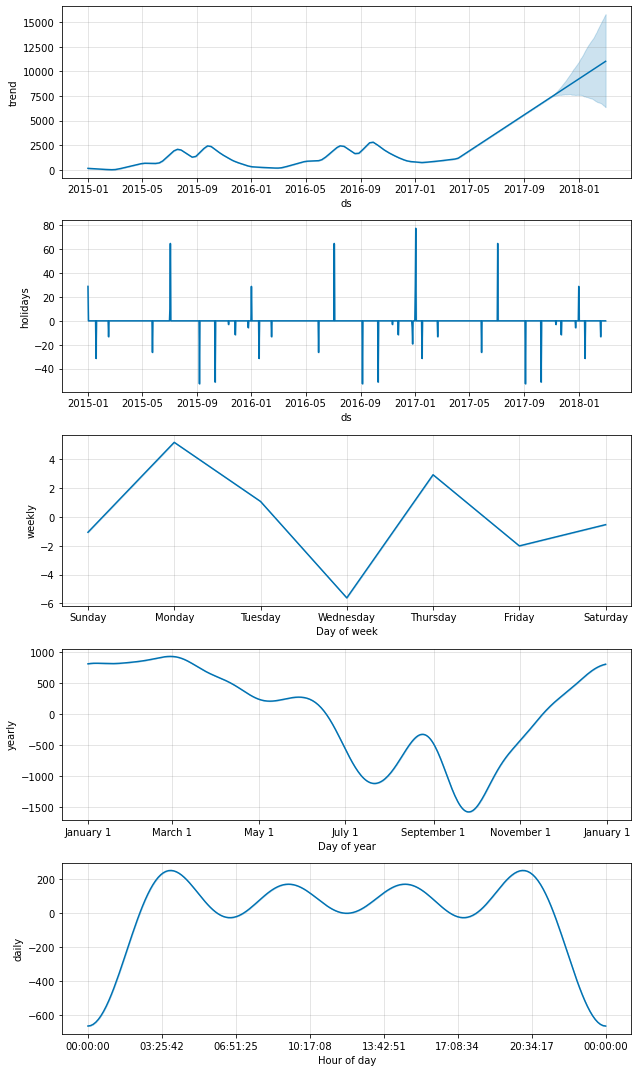

In [71]:
# Plot the components of the model
fig = final_model.plot_components(forecast)

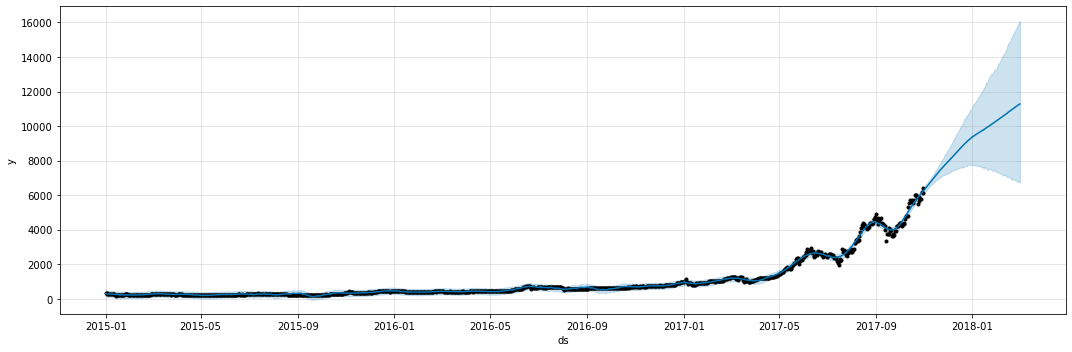

In [72]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = final_model.plot(forecast,ax=ax)
plt.show()

In [73]:
X_tst_final= final_model.predict(X_tst)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
54,2017-12-25,9097.854747,7606.788248,10821.232924
55,2017-12-26,9141.272444,7685.057173,10913.099499
56,2017-12-27,9175.098114,7694.061621,10953.456251
57,2017-12-28,9222.978901,7699.136154,10988.611221
58,2017-12-29,9256.151449,7686.822250,11112.410214
59,2017-12-30,9294.571223,7634.653385,11194.632129
60,2017-12-31,9329.850822,7620.442797,11272.757211


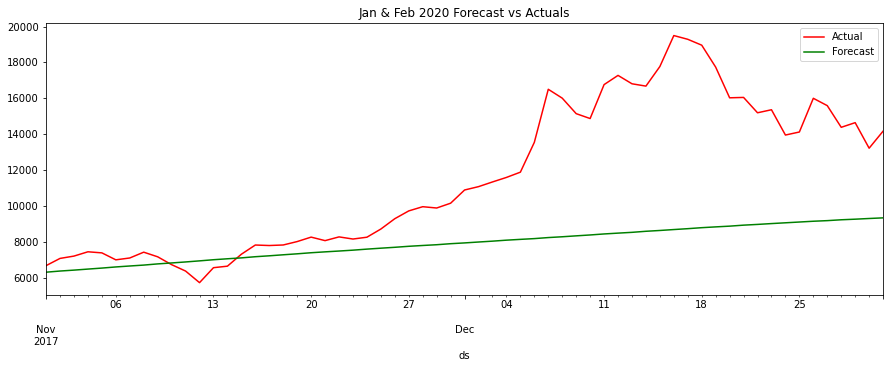

In [74]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_final.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()

In [75]:
MAPE = mean_absolute_percentage_error(X_tst['y'],abs(X_tst_final['yhat']))
print('MAPE', MAPE)

MAPE 26.44257709742851


# Adding the parameters reduced the error, thus model is working better

# Train the model (old)

In [77]:
m = Prophet.Prophet(interval_width=0.95, daily_seasonality=True)
m.fit(bitcoin3)

In [78]:
m.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

# Forecast

In [79]:
future = m.make_future_dataframe(periods=57,freq='D') # predicitn for 100 days
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,-266.373789,-1435.820941,964.814767,-266.373789,-266.373789,4.031615,4.031615,4.031615,-2326.713338,...,13.302448,13.302448,13.302448,2317.442505,2317.442505,2317.442505,0.0,0.0,0.0,-262.342173
1,2015-01-02,-246.643174,-1501.764834,866.392682,-246.643174,-246.643174,-43.968829,-43.968829,-43.968829,-2326.713338,...,4.115943,4.115943,4.115943,2278.628566,2278.628566,2278.628566,0.0,0.0,0.0,-290.612003
2,2015-01-03,-226.912558,-1444.568619,882.631156,-226.912558,-226.912558,-83.072979,-83.072979,-83.072979,-2326.713338,...,-1.646272,-1.646272,-1.646272,2245.286631,2245.286631,2245.286631,0.0,0.0,0.0,-309.985537
3,2015-01-04,-207.181943,-1568.253761,847.098841,-207.181943,-207.181943,-123.083316,-123.083316,-123.083316,-2326.713338,...,-14.350123,-14.350123,-14.350123,2217.980145,2217.980145,2217.980145,0.0,0.0,0.0,-330.265259
4,2015-01-05,-187.451328,-1429.101222,843.950782,-187.451328,-187.451328,-127.212521,-127.212521,-127.212521,-2326.713338,...,2.421994,2.421994,2.421994,2197.078823,2197.078823,2197.078823,0.0,0.0,0.0,-314.663849


# Plot the forecast

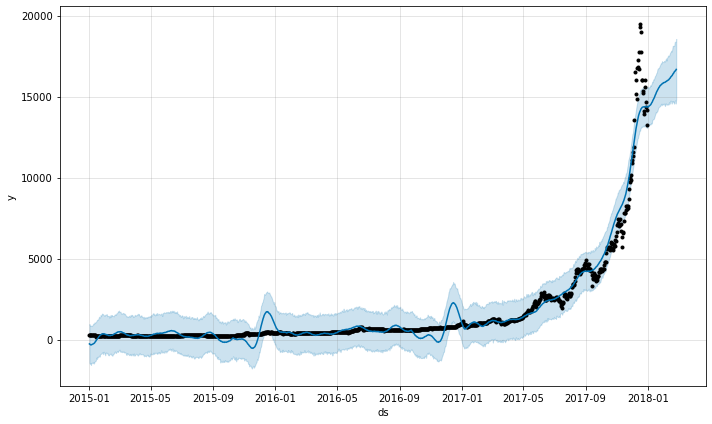

In [80]:
plot1 = m.plot(forecast)

# Plotting components

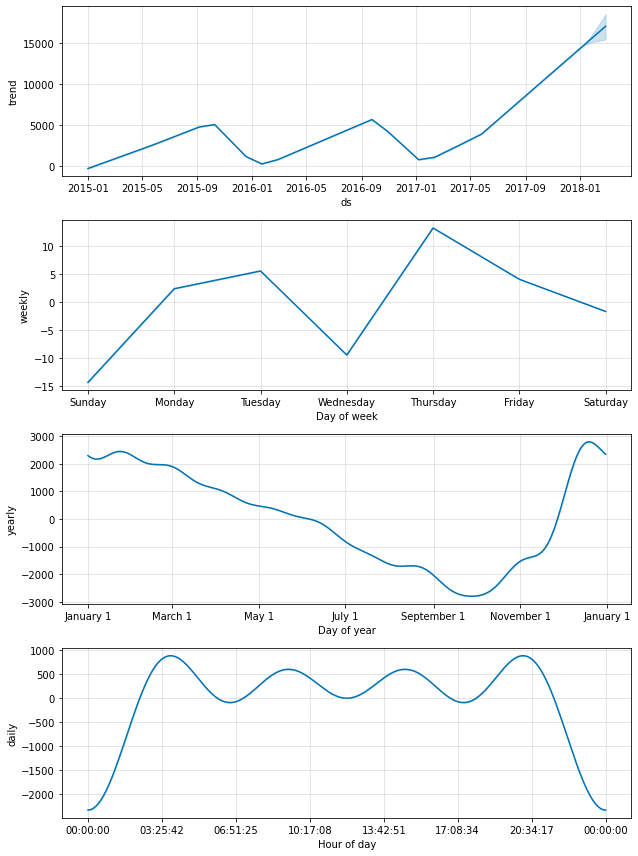

In [81]:
plt2 = m.plot_components(forecast);

# Predicting for 2 yrs with initial data

In [83]:
m = Prophet.Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(bitcoin3)

In [84]:
# Make a future dataframe for 2 years
bitcoin_forecast = m.make_future_dataframe(periods=365 * 2, freq='D')# Make predictions
bitcoin_forecast = m.predict(bitcoin_forecast)

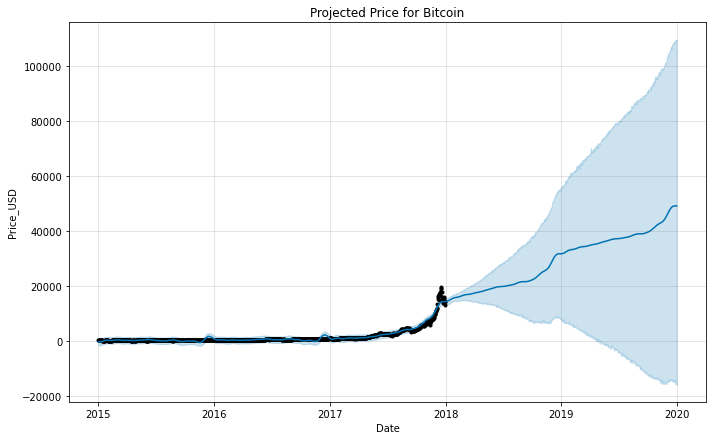

In [85]:
m.plot(bitcoin_forecast, xlabel = 'Date', ylabel = 'Price_USD')
plt.title('Projected Price for Bitcoin');

In [86]:
m.changepoints[:10]

35    2015-02-07
70    2015-03-14
105   2015-04-18
140   2015-05-23
175   2015-06-27
210   2015-08-01
244   2015-09-05
279   2015-10-10
314   2015-11-14
349   2015-12-19
Name: ds, dtype: datetime64[ns]

# Plotting Changepoints

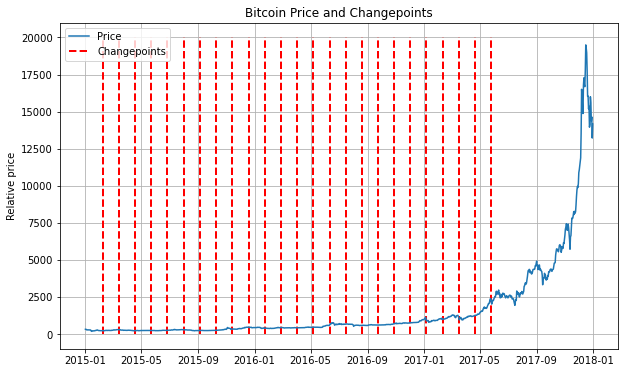

In [87]:
# Plot the changepoints
bitcoin_changepoints = [str(date) for date in m.changepoints]

plt.plot(bitcoin3['ds'], bitcoin3['y'], label= "Price")
plt.vlines(bitcoin_changepoints, ymin = 0, ymax= 20000, colors = 'r', linewidth= 2, linestyles = 'dashed', label = 'Changepoints')

# Formatting of plot
plt.grid('off'); plt.ylabel('Relative price'); plt.legend()
plt.title('Bitcoin Price and Changepoints');

# Trends & Patterns for 2 yrs

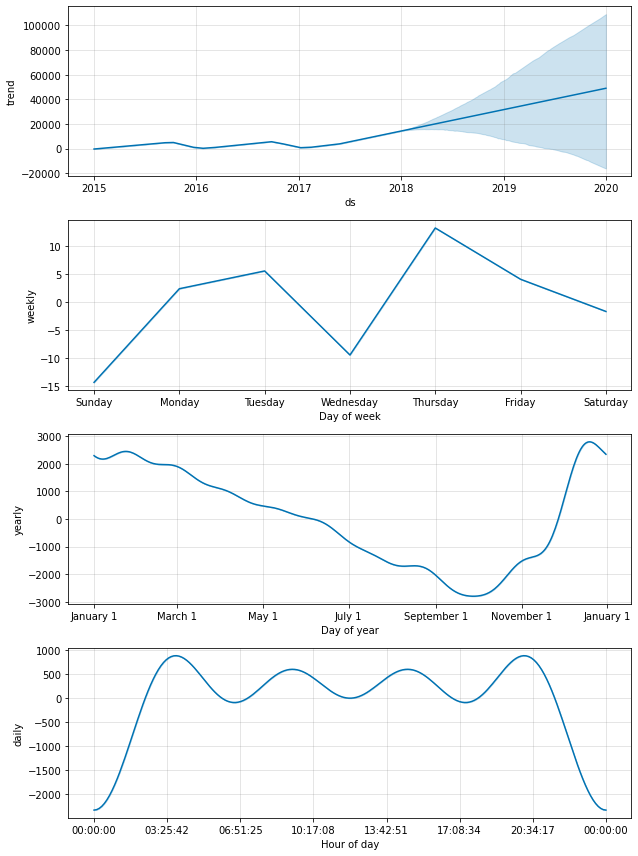

In [88]:
# Plot the trends and patterns
m.plot_components(bitcoin_forecast);

# Model#1  Training with only 1 month data

# Build our 1 month chunk

# Prepping 1 month data

In [90]:
Model1 = bitcoin3[1062: 1092]
Model1

,ds,y
1062,2017-12-01,10883.91200
1063,2017-12-02,11071.36833
1064,2017-12-03,11332.62200
1065,2017-12-04,11584.83000
1066,2017-12-05,11878.43333
1067,2017-12-06,13540.98000
1068,2017-12-07,16501.97167
1069,2017-12-08,16007.43667
1070,2017-12-09,15142.83415
1071,2017-12-10,14869.80500


In [91]:
# Model1 = Model1.rename(columns={'date': 'ds', 'price_usd': 'y'})
# Model1.head()

# Forecasting for next year (Model 1)

# Training the model (on 1 month data)

In [49]:
# m = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality = True)
# m.fit(Model1)

In [93]:
m = Prophet.Prophet(holidays=holiday,changepoint_prior_scale= 0.4, holidays_prior_scale= 0.3,n_changepoints= 100,
                      seasonality_mode= 'additive',
                      weekly_seasonality= True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
m.add_country_holidays(country_name='US')
m.fit(Model1)

INFO:prophet:n_changepoints greater than number of observations. Using 23.


# Predicting for future 1 yr using model trained on 1 month

In [94]:
# Make a future dataframe for 1 years
Model1_forecast = m.make_future_dataframe(periods=365, freq='D')# Make predictions
Model1_forecast = m.predict(Model1_forecast)

In [95]:
Model1_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
390,2018-12-26,-1.527484e+06,-3.086393e+06,143861.246999,-3.159555e+06,69666.259848,0.0,0.0,0.0,0.0,...,-178.010935,-178.010935,-178.010935,113507.709570,113507.709570,113507.709570,0.0,0.0,0.0,-1.453334e+06
391,2018-12-27,-1.531504e+06,-3.092774e+06,149486.782932,-3.170819e+06,71091.439988,0.0,0.0,0.0,0.0,...,-56.178114,-56.178114,-56.178114,117529.471438,117529.471438,117529.471438,0.0,0.0,0.0,-1.453210e+06
392,2018-12-28,-1.535524e+06,-3.100231e+06,154239.685062,-3.182205e+06,72578.319286,0.0,0.0,0.0,0.0,...,4.349369,4.349369,4.349369,121376.635811,121376.635811,121376.635811,0.0,0.0,0.0,-1.453323e+06
393,2018-12-29,-1.539545e+06,-3.107997e+06,159789.301820,-3.193638e+06,74103.741708,0.0,0.0,0.0,0.0,...,123.508602,123.508602,123.508602,124902.959695,124902.959695,124902.959695,0.0,0.0,0.0,-1.453698e+06
394,2018-12-30,-1.543565e+06,-3.116472e+06,164040.309432,-3.205074e+06,75668.912004,0.0,0.0,0.0,0.0,...,-532.669065,-532.669065,-532.669065,127939.670627,127939.670627,127939.670627,0.0,0.0,0.0,-1.455337e+06


# Plotting

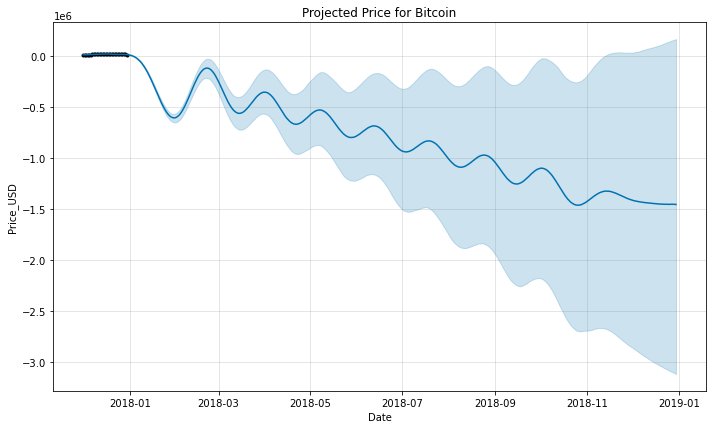

In [96]:
m.plot(Model1_forecast, xlabel = 'Date', ylabel = 'Price_USD')
plt.title('Projected Price for Bitcoin');

# Components for 2018

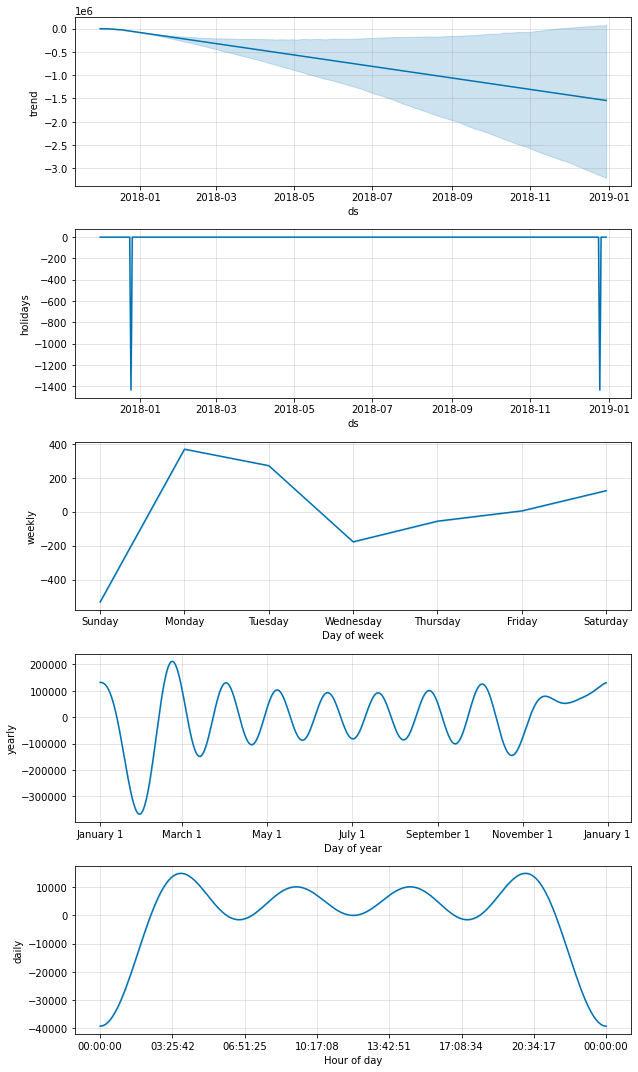

In [97]:
# Plot the trends and patterns
m.plot_components(Model1_forecast);

In [109]:
X_tst_final= final_model.predict(Model1_forecast)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
388,2018-12-24,19974.941019,-9407.713923,50950.111303
389,2018-12-25,20008.231207,-9399.747548,51371.612753
390,2018-12-26,20049.348182,-9512.684021,51635.260036
391,2018-12-27,20098.740756,-9572.840046,51791.791889
392,2018-12-28,20133.417535,-9738.665394,51950.486661
393,2018-12-29,20173.312294,-9566.447990,52071.191982
394,2018-12-30,20210.016928,-9667.906072,52145.416088


# The model is predicting that the trend will go down for 2018

# We also see that the days have changed to high sales on Monday & Tuesdays, but low is the same as Wednesday

# Model is doing horrible prediction when trianed only on 1 month

# Model #2

# Training data on 3 months and making prediction

# Building our 3 month chunk

# finding index

In [98]:
print (bitcoin3.loc[bitcoin3['ds'] == '2017-10-01'])

             ds            y
1001 2017-10-01  4360.722967


In [99]:
Model2 = bitcoin3[1001: 1092]
Model2

,ds,y
1001,2017-10-01,4360.722967
1002,2017-10-02,4386.883750
1003,2017-10-03,4293.306600
1004,2017-10-04,4225.175000
1005,2017-10-05,4338.852000
...,...,...
1087,2017-12-26,15999.048330
1088,2017-12-27,15589.321670
1089,2017-12-28,14380.581670
1090,2017-12-29,14640.140000


In [100]:
# Model2 = Model2.rename(columns={'date': 'ds', 'price_usd': 'y'})
# Model2.head()

# Training the model

In [101]:
m = Prophet.Prophet(holidays=holiday,changepoint_prior_scale= 0.4, holidays_prior_scale= 0.3,n_changepoints= 100,
                      seasonality_mode= 'additive',
                      weekly_seasonality= True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
m.add_country_holidays(country_name='US')
m.fit(Model2)

INFO:prophet:n_changepoints greater than number of observations. Using 71.


# Predicting for future 1 yr using model trained on 3 months data

In [102]:
# Make a future dataframe for 1 years
Model2_forecast = m.make_future_dataframe(periods=365, freq='D')# Make predictions
Model2_forecast = m.predict(Model2_forecast)

In [103]:
Model2_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
451,2018-12-26,27869.168682,11598.391910,75099.845217,-5831.649786,58596.237045,0.0,0.0,0.0,0.0,...,-70.642097,-70.642097,-70.642097,12705.297621,12705.297621,12705.297621,0.0,0.0,0.0,44950.687870
452,2018-12-27,27952.119665,10769.937380,75408.164386,-5954.274660,58779.407932,0.0,0.0,0.0,0.0,...,106.852351,106.852351,106.852351,12316.986417,12316.986417,12316.986417,0.0,0.0,0.0,44822.822097
453,2018-12-28,28035.070649,10485.977011,75365.345676,-6078.505740,58960.323546,0.0,0.0,0.0,0.0,...,72.582424,72.582424,72.582424,12030.550041,12030.550041,12030.550041,0.0,0.0,0.0,44585.066778
454,2018-12-29,28118.021632,10116.967567,75363.112684,-6201.907514,59140.848797,0.0,0.0,0.0,0.0,...,6.559271,6.559271,6.559271,11867.876635,11867.876635,11867.876635,0.0,0.0,0.0,44439.321202
455,2018-12-30,28200.972616,10338.661807,75227.331560,-6334.627945,59320.387161,0.0,0.0,0.0,0.0,...,-173.597247,-173.597247,-173.597247,11845.967044,11845.967044,11845.967044,0.0,0.0,0.0,44320.206076


# Plotting

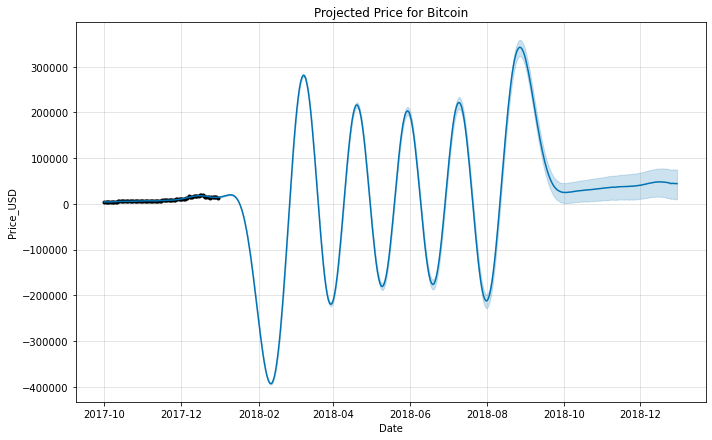

In [104]:
m.plot(Model2_forecast, xlabel = 'Date', ylabel = 'Price_USD')
plt.title('Projected Price for Bitcoin');

# Plotting the components

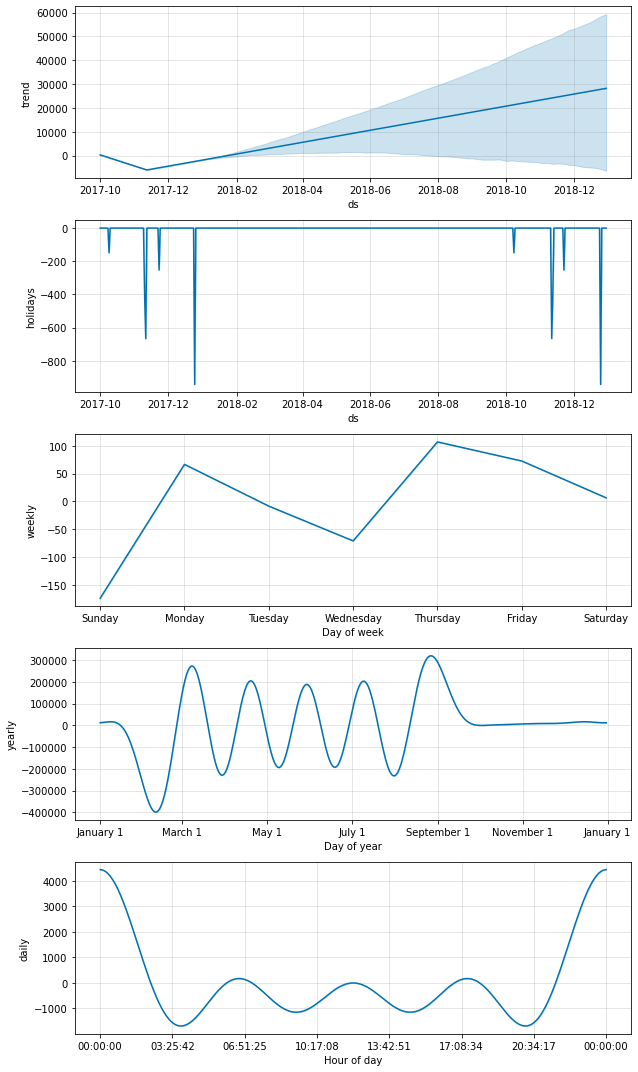

In [105]:
# Plot the trends and patterns
m.plot_components(Model2_forecast);

In [106]:
X_tst_final= final_model.predict(Model2_forecast)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
449,2018-12-24,19974.941019,-10802.137444,47606.336161
450,2018-12-25,20008.231207,-10881.690592,47791.721230
451,2018-12-26,20049.348182,-10918.381035,47811.736379
452,2018-12-27,20098.740756,-11007.479591,48066.789505
453,2018-12-28,20133.417535,-11162.854298,48226.708785
454,2018-12-29,20173.312294,-11213.069553,48357.142566
455,2018-12-30,20210.016928,-11288.274223,48482.849424


# Training on 3 months reveal better analysis. We see upward trend with Monday & Thursday 
as high sales days and wednesdays as low sales days

# Model doing better prediction

# Model#3

# Training using entire dataset

# Prep the dataset

In [110]:
Model3 = bitcoin3
Model3

,ds,y
0,2015-01-01,315.70000
1,2015-01-02,316.15000
2,2015-01-03,302.33000
3,2015-01-04,270.93000
4,2015-01-05,276.80000
...,...,...
1088,2017-12-27,15589.32167
1089,2017-12-28,14380.58167
1090,2017-12-29,14640.14000
1091,2017-12-30,13215.57400


In [111]:
# Model3 = Model3.rename(columns={'date': 'ds', 'price_usd': 'y'})
# Model3.head()

# Training the model on all data

In [112]:
m = Prophet.Prophet(holidays=holiday,changepoint_prior_scale= 0.4, holidays_prior_scale= 0.3,n_changepoints= 100,
                      seasonality_mode= 'additive',
                      weekly_seasonality= True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
m.add_country_holidays(country_name='US')
m.fit(Model3)

In [113]:
# Make a future dataframe for 1 years
Model3_forecast = m.make_future_dataframe(periods=365, freq='D')# Make predictions
Model3_forecast = m.predict(Model3_forecast)

In [114]:
Model3_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1453,2018-12-27,28660.360591,-9587.157115,73422.362174,-11700.655552,71614.001713,0.0,0.0,0.0,0.0,...,11.583402,11.583402,11.583402,4908.246628,4908.246628,4908.246628,0.0,0.0,0.0,30035.951363
1454,2018-12-28,28698.750975,-10726.940848,72808.059084,-11891.451983,71819.860428,0.0,0.0,0.0,0.0,...,4.210877,4.210877,4.210877,4824.762162,4824.762162,4824.762162,0.0,0.0,0.0,29983.484757
1455,2018-12-29,28737.141359,-10569.431595,72913.251420,-12083.185138,72025.303405,0.0,0.0,0.0,0.0,...,-6.140336,-6.140336,-6.140336,4738.234756,4738.234756,4738.234756,0.0,0.0,0.0,29924.996521
1456,2018-12-30,28775.531743,-11034.763231,73672.665156,-12161.306443,72230.746383,0.0,0.0,0.0,0.0,...,-15.467627,-15.467627,-15.467627,4650.570118,4650.570118,4650.570118,0.0,0.0,0.0,29866.394976
1457,2018-12-31,28813.922127,-11607.144500,73698.477505,-12340.677424,72436.189360,0.0,0.0,0.0,0.0,...,3.108552,3.108552,3.108552,4563.529506,4563.529506,4563.529506,0.0,0.0,0.0,29836.320927


# Plotting

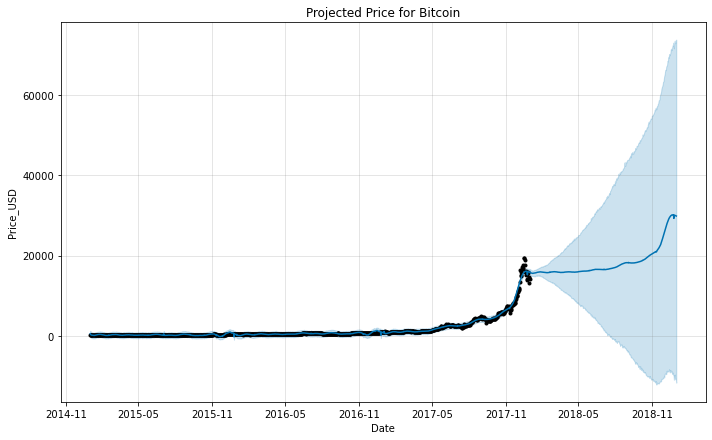

In [115]:
m.plot(Model3_forecast, xlabel = 'Date', ylabel = 'Price_USD')
plt.title('Projected Price for Bitcoin');

# Plotting the components

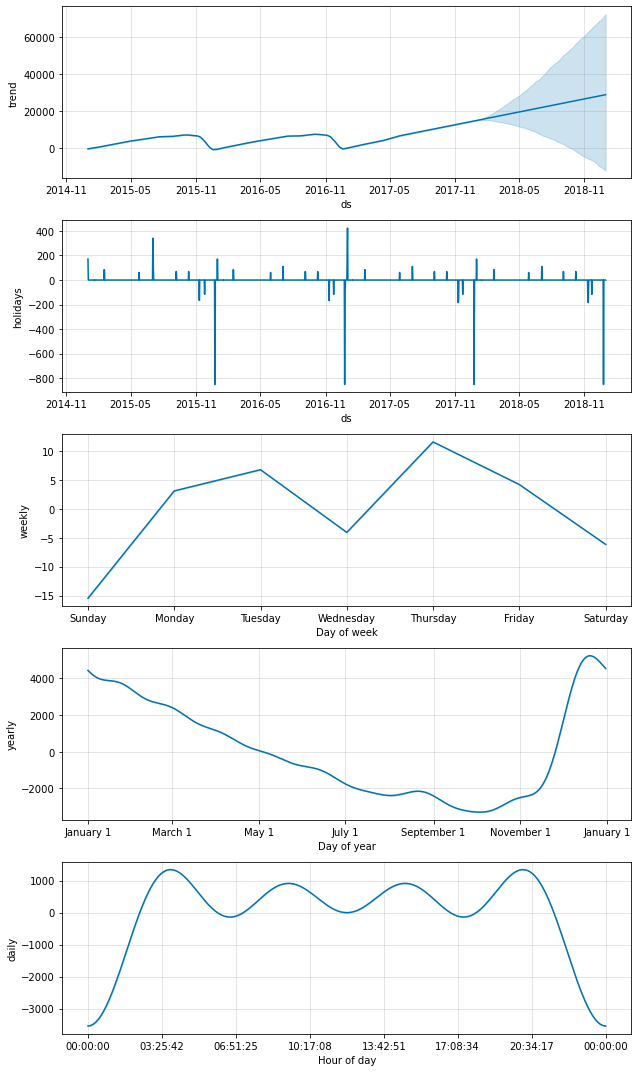

In [116]:
# Plot the trends and patterns
m.plot_components(Model3_forecast);

In [117]:
X_tst_final= final_model.predict(Model3_forecast)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1451,2018-12-25,20008.231207,-9935.820159,49368.082225
1452,2018-12-26,20049.348182,-9992.597315,49392.049628
1453,2018-12-27,20098.740756,-9913.355746,49698.800169
1454,2018-12-28,20133.417535,-9913.229390,49822.315679
1455,2018-12-29,20173.312294,-10054.077253,49981.332849
1456,2018-12-30,20210.016928,-10275.124610,49986.286522
1457,2018-12-31,20252.356616,-10270.953969,50305.303854


# Training on all data is the best 
Sales will tend to trend upwards.
Highest sales on Thursdays. Lowest sales on Wednesdays.
People buy more at 3:30am & 8:30 pm.
Quarter 1 is ideal to buy.
Quarter 4 is ideal to sell.
In the original data we only have 23% of transactions that gave >2% ROI

In [118]:
Model3_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,-557.577832,-153.884086,1300.710876,-557.577832,-557.577832,0.0,0.0,0.0,0.0,...,11.583402,11.583402,11.583402,4478.700124,4478.700124,4478.700124,0.0,0.0,0.0,559.347670
1,2015-01-02,-526.409756,-393.922353,1100.265277,-526.409756,-526.409756,0.0,0.0,0.0,0.0,...,4.210877,4.210877,4.210877,4397.470428,4397.470428,4397.470428,0.0,0.0,0.0,331.032292
2,2015-01-03,-495.241680,-429.304680,948.287618,-495.241680,-495.241680,0.0,0.0,0.0,0.0,...,-6.140336,-6.140336,-6.140336,4321.010819,4321.010819,4321.010819,0.0,0.0,0.0,275.389545
3,2015-01-04,-464.073604,-507.533287,956.643065,-464.073604,-464.073604,0.0,0.0,0.0,0.0,...,-15.467627,-15.467627,-15.467627,4250.260021,4250.260021,4250.260021,0.0,0.0,0.0,226.479534
4,2015-01-05,-432.905527,-453.520024,920.190142,-432.905527,-432.905527,0.0,0.0,0.0,0.0,...,3.108552,3.108552,3.108552,4185.917334,4185.917334,4185.917334,0.0,0.0,0.0,211.881101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2018-12-27,28660.360591,-9587.157115,73422.362174,-11700.655552,71614.001713,0.0,0.0,0.0,0.0,...,11.583402,11.583402,11.583402,4908.246628,4908.246628,4908.246628,0.0,0.0,0.0,30035.951363
1454,2018-12-28,28698.750975,-10726.940848,72808.059084,-11891.451983,71819.860428,0.0,0.0,0.0,0.0,...,4.210877,4.210877,4.210877,4824.762162,4824.762162,4824.762162,0.0,0.0,0.0,29983.484757
1455,2018-12-29,28737.141359,-10569.431595,72913.251420,-12083.185138,72025.303405,0.0,0.0,0.0,0.0,...,-6.140336,-6.140336,-6.140336,4738.234756,4738.234756,4738.234756,0.0,0.0,0.0,29924.996521
1456,2018-12-30,28775.531743,-11034.763231,73672.665156,-12161.306443,72230.746383,0.0,0.0,0.0,0.0,...,-15.467627,-15.467627,-15.467627,4650.570118,4650.570118,4650.570118,0.0,0.0,0.0,29866.394976


In [119]:
Model3_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (Observed)', 'Christmas Day (Observed)_lower',
       'Christmas Day (Observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (Observed)',
       'Independence Day (Observed)_lower',
       'Independence Day (Observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Martin Luther King Jr. Day_upper',
       'Memorial Day', 'Memorial Day_lower', 'Memorial Day_upper',
       'New Year's Day', 'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
       'Thanksgiv

# Finding if ROI>2%

# Building our Dataframe

In [120]:
Model3_forecast_ROI = Model3_forecast.drop(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (Observed)', 'Christmas Day (Observed)_lower',
       'Christmas Day (Observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (Observed)',
       'Independence Day (Observed)_lower',
       'Independence Day (Observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Martin Luther King Jr. Day_upper',
       'Memorial Day', 'Memorial Day_lower', 'Memorial Day_upper',
       "New Year's Day", "New Year's Day_lower", "New Year's Day_upper",
       "New Year's Day (Observed)", "New Year's Day (Observed)_lower",
       "New Year's Day (Observed)_upper", 'Thanksgiving', 'Thanksgiving_lower',
       'Thanksgiving_upper', 'US-Holidays', 'US-Holidays_lower',
       'US-Holidays_upper', 'Veterans Day', 'Veterans Day_lower',
       'Veterans Day_upper', 'Veterans Day (Observed)',
       'Veterans Day (Observed)_lower', 'Veterans Day (Observed)_upper',
       "Washington's Birthday", "Washington's Birthday_lower",
       "Washington's Birthday_upper", 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper'], axis = 1)

In [121]:
Model3_forecast_ROI

,ds,yhat
0,2015-01-01,559.347670
1,2015-01-02,331.032292
2,2015-01-03,275.389545
3,2015-01-04,226.479534
4,2015-01-05,211.881101
...,...,...
1453,2018-12-27,30035.951363
1454,2018-12-28,29983.484757
1455,2018-12-29,29924.996521
1456,2018-12-30,29866.394976


# Adding >2% ROI column

In [124]:
Model3_forecast_ROI['daily_return'] = (Model3_forecast_ROI['yhat']/ Model3_forecast_ROI['yhat'].shift(1)-1) * 100
Model3_forecast_ROI['daily_return'] 

0             NaN
1      -40.818151
2      -16.808858
3      -17.760301
4       -6.445806
          ...    
1453    -0.081109
1454    -0.174679
1455    -0.195068
1456    -0.195828
1457    -0.100695
Name: daily_return, Length: 1458, dtype: float64

In [125]:
Model3_forecast_ROI.head()

,ds,yhat,daily_return
0,2015-01-01,559.347670,NaN
1,2015-01-02,331.032292,-40.818151
2,2015-01-03,275.389545,-16.808858
3,2015-01-04,226.479534,-17.760301
4,2015-01-05,211.881101,-6.445806


In [126]:
Model3_forecast_ROI['daily_return'] = np.where(Model3_forecast_ROI['daily_return'] > 2, 1, 0)

In [127]:
Model3_forecast_ROI.head()

,ds,yhat,daily_return
0,2015-01-01,559.347670,0
1,2015-01-02,331.032292,0
2,2015-01-03,275.389545,0
3,2015-01-04,226.479534,0
4,2015-01-05,211.881101,0


In [128]:
Model3_forecast_ROI['daily_return'].value_counts()

0    1138
1     320
Name: daily_return, dtype: int64

# Plotting ROI

In [129]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

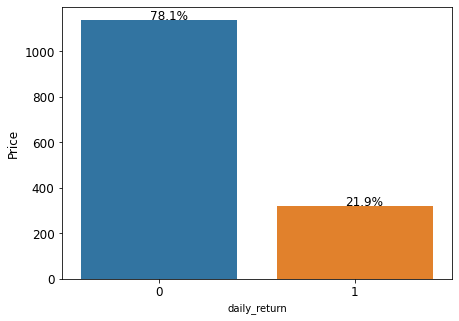

In [130]:
plt.figure(figsize = (7,5))
ax = sns.countplot('daily_return', data = Model3_forecast_ROI)
plt.xticks(size =12)
plt.yticks(size=12)
plt.ylabel("Price",size=12)
without_hue(ax , Model3_forecast_ROI.daily_return)

# After prediction the transactions that have >2% goes down to 21.9% from 23%(from original data)

# Conclusion is we only get a little over 20% of transactions in a year that give a ROI>2%

# ##Analysis codes using SARIMA Model

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [3]:
bitcoin = pd.read_csv("bitcoin_v2.csv", parse_dates =[0] )
bitcoin = bitcoin.drop('Unnamed: 0', axis=1)
bitcoin.head()

,date,confirmation_time,difficulty,hash_rate,market_cap,price_usd,total_block_size,total_miner_revenue,total_supply,total_trx_fees,trade_volume,transactions,trx_cost_percent,trx_per_block,trx_volume,unique_addresses,daily_return
0,2015-01-01,7.150000,4.064096e+10,335365.2901,4.317111e+09,315.70,27835.0,1312680.60,13674725.0,8.003076,5.553875e+06,58963,5.244721,555.0,79280.0,116012,0
1,2015-01-02,6.933333,4.064096e+10,323243.6531,4.324529e+09,316.15,27875.0,1267761.50,13678725.0,10.727695,6.440896e+06,72234,4.477312,627.0,89563.0,168563,0
2,2015-01-03,6.433333,4.064096e+10,331324.7444,4.136728e+09,302.33,27922.0,1242878.63,13682825.0,11.906088,2.938312e+07,82832,2.277049,734.0,180541.0,207571,0
3,2015-01-04,8.033333,4.064096e+10,335365.2901,3.708212e+09,270.93,27971.0,1129778.10,13686975.0,20.288107,5.310479e+07,85570,1.376066,692.0,303038.0,206228,0
4,2015-01-05,6.816667,4.064096e+10,339405.8358,3.789717e+09,276.80,28024.0,1166988.80,13691175.0,16.967084,3.132672e+07,93753,1.863192,751.0,226278.0,193982,1


In [4]:
bitcoin['date'] = bitcoin['date'].astype('datetime64[ns]')

In [5]:
bitcoin2 = bitcoin.copy()

In [6]:
bitcoin2.head()

,date,confirmation_time,difficulty,hash_rate,market_cap,price_usd,total_block_size,total_miner_revenue,total_supply,total_trx_fees,trade_volume,transactions,trx_cost_percent,trx_per_block,trx_volume,unique_addresses,daily_return
0,2015-01-01,7.150000,4.064096e+10,335365.2901,4.317111e+09,315.70,27835.0,1312680.60,13674725.0,8.003076,5.553875e+06,58963,5.244721,555.0,79280.0,116012,0
1,2015-01-02,6.933333,4.064096e+10,323243.6531,4.324529e+09,316.15,27875.0,1267761.50,13678725.0,10.727695,6.440896e+06,72234,4.477312,627.0,89563.0,168563,0
2,2015-01-03,6.433333,4.064096e+10,331324.7444,4.136728e+09,302.33,27922.0,1242878.63,13682825.0,11.906088,2.938312e+07,82832,2.277049,734.0,180541.0,207571,0
3,2015-01-04,8.033333,4.064096e+10,335365.2901,3.708212e+09,270.93,27971.0,1129778.10,13686975.0,20.288107,5.310479e+07,85570,1.376066,692.0,303038.0,206228,0
4,2015-01-05,6.816667,4.064096e+10,339405.8358,3.789717e+09,276.80,28024.0,1166988.80,13691175.0,16.967084,3.132672e+07,93753,1.863192,751.0,226278.0,193982,1


In [7]:
bitcoin2 = bitcoin2.drop(['confirmation_time', 'difficulty', 'hash_rate', 'market_cap',
       'total_block_size', 'total_miner_revenue', 'total_supply',
       'total_trx_fees', 'trade_volume', 'transactions', 'trx_cost_percent',
       'trx_per_block', 'trx_volume', 'unique_addresses', 'daily_return'], axis = 1)

In [8]:
bitcoin2.head()

,date,price_usd
0,2015-01-01,315.70
1,2015-01-02,316.15
2,2015-01-03,302.33
3,2015-01-04,270.93
4,2015-01-05,276.80


In [9]:
bitcoin_arima = bitcoin2

In [10]:
bitcoin_arima.head()

,date,price_usd
0,2015-01-01,315.70
1,2015-01-02,316.15
2,2015-01-03,302.33
3,2015-01-04,270.93
4,2015-01-05,276.80


In [11]:
bitcoin_arima.dtypes

date         datetime64[ns]
price_usd           float64
dtype: object

In [12]:
bitcoin_arima['price_usd'].unique()

array([  315.7  ,   316.15 ,   302.33 , ..., 14640.14 , 13215.574,
       14165.575])

In [187]:
bitcoin_arima['price_usd'] = bitcoin_arima['price_usd'].astype(np.int32)

In [188]:
bitcoin_arima['date'] = pd.to_datetime(bitcoin_arima['date'], format = '%Y-%m')

# Plotting

In [13]:
to_plot_monthly_variation = bitcoin_arima

In [14]:
mon = bitcoin_arima['month']

In [15]:
# only storing month for each index 
temp = pd.DatetimeIndex(mon)

In [16]:
# decompose yyyy-mm data-type 
month = pd.Series(temp.month)

In [17]:
# dropping month from to_plot_monthly_variation
to_plot_monthly_variation = to_plot_monthly_variation.drop(['date'], axis = 1)

In [18]:
# join months so we can get month to average monthly rider mapping
to_plot_monthly_variation = to_plot_monthly_variation.join(month)

In [19]:
# A quick glance
to_plot_monthly_variation.head()

,price_usd,date
0,315.70,1
1,316.15,1
2,302.33,1
3,270.93,1
4,276.80,1


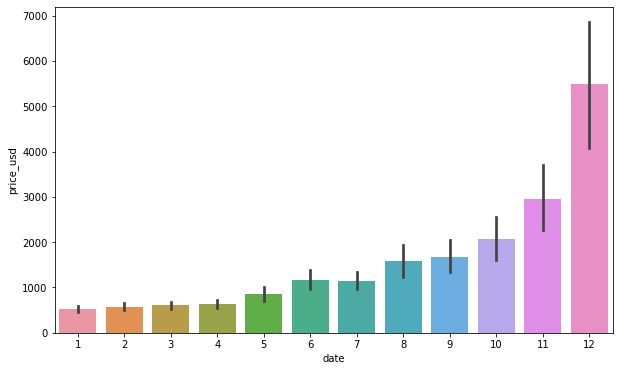

In [20]:
# Plotting bar plot for each month
sns.barplot(x = 'date', y = 'price_usd', data = to_plot_monthly_variation)
plt.show()

# Looking for Trend

In [21]:
rider = bitcoin_arima[['price_usd']]

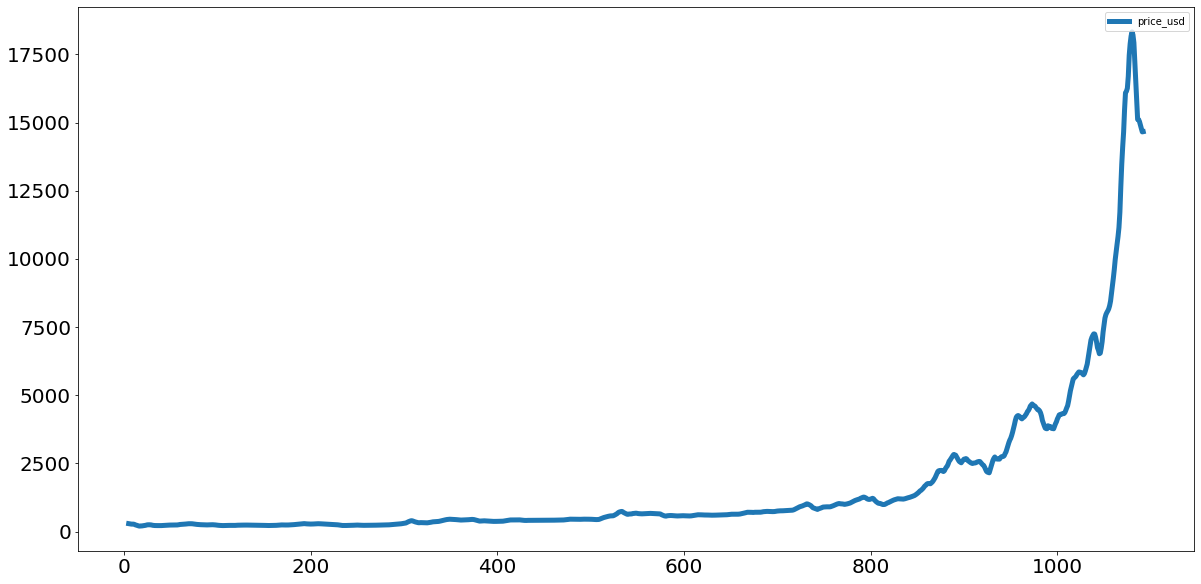

In [22]:
rider.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

# Seasonality analysis

# Usinf 1st discrete difference of object

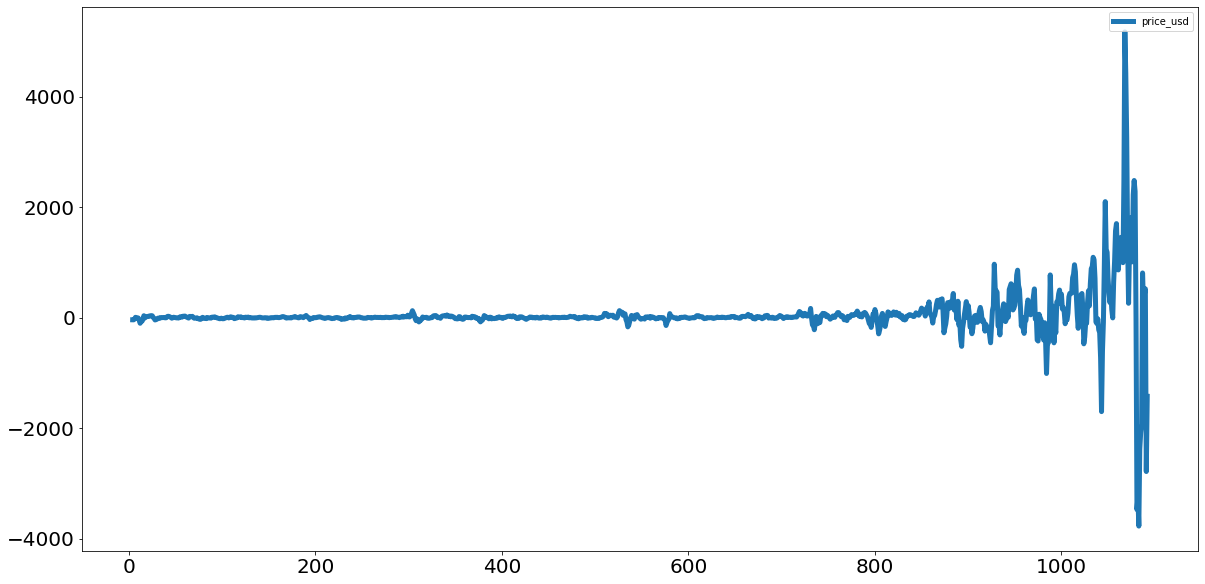

In [23]:
rider.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

# the above fig shows difference of price_usd of a month & 4 months before that month

# gives us idea about the variation of data for a period  of time

# Periodicity & autocorrelation

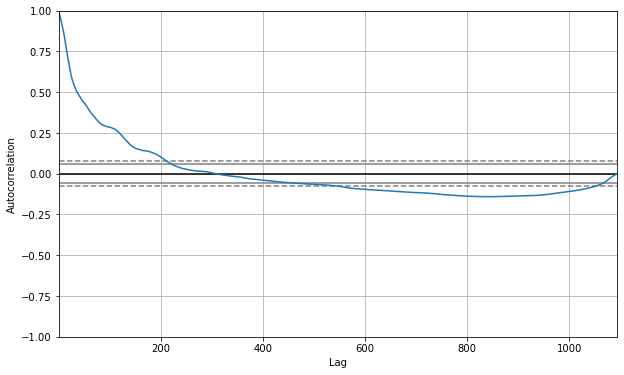

In [24]:
pd.plotting.autocorrelation_plot(bitcoin_arima['price_usd'])
plt.show()

# horizontal axis represnts time lag (previous time steps), in our case it is day

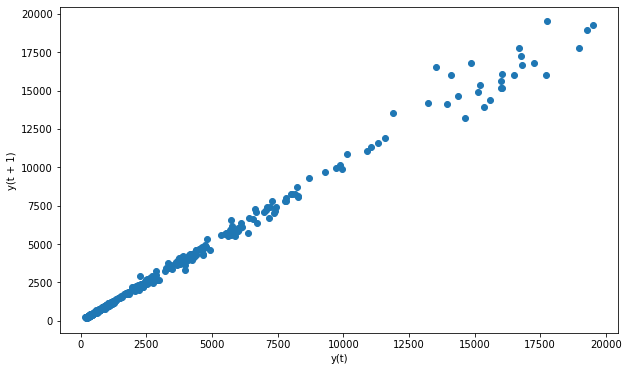

In [25]:
pd.plotting.lag_plot(bitcoin_arima['price_usd'])
plt.show()

# The above curve represents the relation between current time step and its previous time step

In [26]:
bitcoin_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1093 non-null   datetime64[ns]
 1   price_usd  1093 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [203]:
#bitcoin_arima['price_usd'] = bitcoin_arima['price_usd'].astype(np.int32)

In [204]:
#bitcoin_arima['date'] = pd.to_datetime(bitcoin_arima['date'], format = '%Y-%m')

In [27]:
df = bitcoin_arima.set_index('date')

In [28]:
df

,price_usd
date,
2015-01-01,315.70000
2015-01-02,316.15000
2015-01-03,302.33000
2015-01-04,270.93000
2015-01-05,276.80000
...,...
2017-12-27,15589.32167
2017-12-28,14380.58167
2017-12-29,14640.14000


# Building SARIMAX

# Our optimal P,D,Q from earlier codes = 3,2,1

In [29]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(df['price_usd'], trend='n', order=(3,2,1), seasonal_order=(3,2,1,12))
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          price_usd   No. Observations:                 1093
Model:             SARIMAX(3, 2, 1)x(3, 2, 1, 12)   Log Likelihood               -7265.201
Date:                            Fri, 03 Dec 2021   AIC                          14548.402
Time:                                    13:18:36   BIC                          14593.156
Sample:                                         0   HQIC                         14565.358
                                           - 1093                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2377      0.009     25.971      0.000       0.220       0.256
ar.L2         -0.1358      0.011   

# To check your code

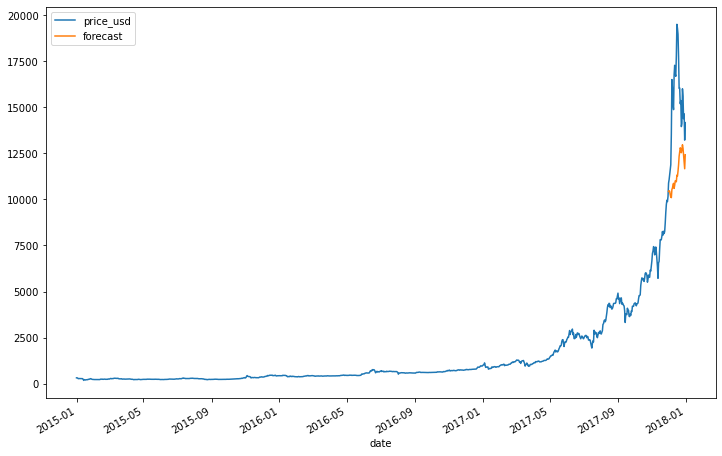

In [30]:
df['forecast'] = results.predict(start = 1062, end= 1092, dynamic= True)  
df[['price_usd', 'forecast']].plot(figsize=(12, 8))
plt.show()

# Generate future forecast

In [35]:
from pandas.tseries.offsets import DateOffset

def forcasting_future_days(df, no_of_days):
    df_perdict = df.reset_index()
    mon = df_perdict['date']
    mon = mon + pd.DateOffset(days = no_of_days)
    future_dates = mon[-no_of_days -1:]
    df_perdict = df_perdict.set_index('date')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 1092, end = 1458, dynamic= True)  
    df_perdict[['price_usd', 'forecast']].iloc[-no_of_days - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_days:]

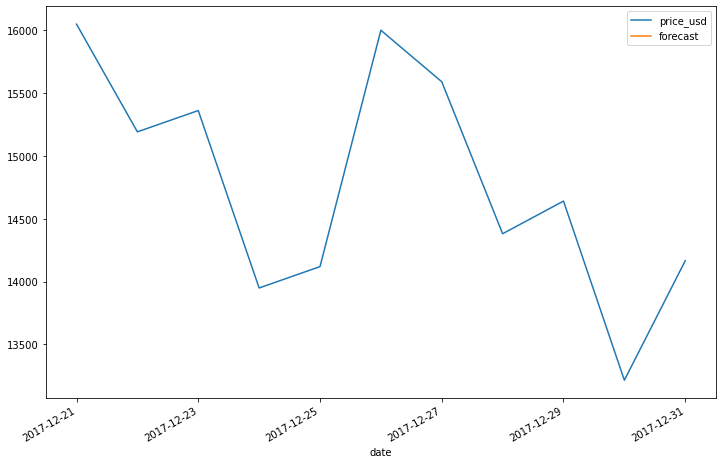

In [36]:
predicted = forcasting_future_days(df,20)

# foercasting SARIMAX with other codes (same as above just not a function)

In [59]:
bitcoin = pd.read_csv("bitcoin_v2.csv", parse_dates =[0] )
bitcoin = bitcoin.drop('Unnamed: 0', axis=1)
bitcoin.head()

,date,confirmation_time,difficulty,hash_rate,market_cap,price_usd,total_block_size,total_miner_revenue,total_supply,total_trx_fees,trade_volume,transactions,trx_cost_percent,trx_per_block,trx_volume,unique_addresses,daily_return
0,2015-01-01,7.150000,4.064096e+10,335365.2901,4.317111e+09,315.70,27835.0,1312680.60,13674725.0,8.003076,5.553875e+06,58963,5.244721,555.0,79280.0,116012,0
1,2015-01-02,6.933333,4.064096e+10,323243.6531,4.324529e+09,316.15,27875.0,1267761.50,13678725.0,10.727695,6.440896e+06,72234,4.477312,627.0,89563.0,168563,0
2,2015-01-03,6.433333,4.064096e+10,331324.7444,4.136728e+09,302.33,27922.0,1242878.63,13682825.0,11.906088,2.938312e+07,82832,2.277049,734.0,180541.0,207571,0
3,2015-01-04,8.033333,4.064096e+10,335365.2901,3.708212e+09,270.93,27971.0,1129778.10,13686975.0,20.288107,5.310479e+07,85570,1.376066,692.0,303038.0,206228,0
4,2015-01-05,6.816667,4.064096e+10,339405.8358,3.789717e+09,276.80,28024.0,1166988.80,13691175.0,16.967084,3.132672e+07,93753,1.863192,751.0,226278.0,193982,1


In [60]:
#bitcoin['date'] = bitcoin['date'].astype('datetime64[ns]')

In [61]:
bitcoin2= bitcoin.drop(['confirmation_time', 'difficulty', 'hash_rate', 'market_cap',
       'total_block_size', 'total_miner_revenue', 'total_supply',
       'total_trx_fees', 'trade_volume', 'transactions', 'trx_cost_percent',
       'trx_per_block', 'trx_volume', 'unique_addresses', 'daily_return'], axis = 1)

In [62]:
bitcoin_arima = bitcoin2

In [63]:
#bitcoin_arima['price_usd'] = bitcoin_arima['price_usd'].astype(np.int32)

In [64]:
bitcoin_arima['date']=pd.to_datetime(bitcoin_arima['date'])

In [65]:
bitcoin_arima.set_index('date',inplace=True)

In [66]:
bitcoin_arima

,price_usd
date,
2015-01-01,315.70000
2015-01-02,316.15000
2015-01-03,302.33000
2015-01-04,270.93000
2015-01-05,276.80000
...,...
2017-12-27,15589.32167
2017-12-28,14380.58167
2017-12-29,14640.14000


In [57]:
# to_plot_monthly_variation = bitcoin_arima

# # only storing month for each index 
# mon = bitcoin_arima['date']

# # decompose yyyy-mm data-type 
# temp= pd.DatetimeIndex(mon)

# # assign month part of that data to ```month``` variable
# month = pd.Series(temp.month)

# # dropping month from to_plot_monthly_variation
# to_plot_monthly_variation = to_plot_monthly_variation.drop(['date'], axis = 1)

# # join months so we can get month to average monthly rider mapping
# to_plot_monthly_variation = to_plot_monthly_variation.join(month)

# # A quick glance
# to_plot_monthly_variation.head()

# Future forecast

In [67]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(days=x)for x in range(0,730)]

In [68]:
future_datest_df=pd.DataFrame(index= future_dates[1:],columns=bitcoin_arima.columns)

In [69]:
future_datest_df.head()

,price_usd
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN


In [70]:
future_df= pd.concat([bitcoin_arima,future_datest_df])

<AxesSubplot:>

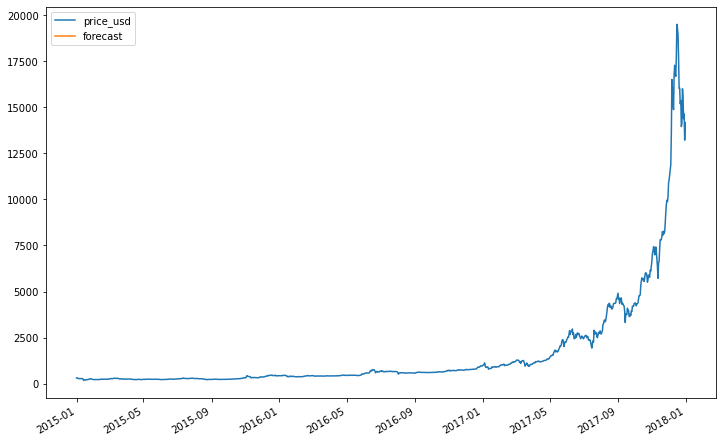

In [76]:
future_df['forecast'] = results.predict(start = 1093, end = 2000, dynamic= True)  
future_df[['price_usd', 'forecast']].plot(figsize=(12, 8)) 

In [77]:
future_df

,price_usd,forecast
2015-01-01,315.70,NaN
2015-01-02,316.15,NaN
2015-01-03,302.33,NaN
2015-01-04,270.93,NaN
2015-01-05,276.80,NaN
...,...,...
2019-12-26,NaN,NaN
2019-12-27,NaN,NaN
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN


In [83]:
# df['forecast'] = results.predict(start = 1093, end =1458 , dynamic= True)  
# df[['price_usd', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 

# Extra old codes using help

# Modeling with ARMIA

In [142]:
bitcoin = pd.read_csv("bitcoin_v2.csv",index_col= [0],  parse_dates = True)
#bitcoin = bitcoin.drop('Unnamed: 0', axis=1)
bitcoin.head()

,date,confirmation_time,difficulty,hash_rate,market_cap,price_usd,total_block_size,total_miner_revenue,total_supply,total_trx_fees,trade_volume,transactions,trx_cost_percent,trx_per_block,trx_volume,unique_addresses,daily_return
0,2015-01-01,7.150000,4.064096e+10,335365.2901,4.317111e+09,315.70,27835.0,1312680.60,13674725.0,8.003076,5.553875e+06,58963,5.244721,555.0,79280.0,116012,0
1,2015-01-02,6.933333,4.064096e+10,323243.6531,4.324529e+09,316.15,27875.0,1267761.50,13678725.0,10.727695,6.440896e+06,72234,4.477312,627.0,89563.0,168563,0
2,2015-01-03,6.433333,4.064096e+10,331324.7444,4.136728e+09,302.33,27922.0,1242878.63,13682825.0,11.906088,2.938312e+07,82832,2.277049,734.0,180541.0,207571,0
3,2015-01-04,8.033333,4.064096e+10,335365.2901,3.708212e+09,270.93,27971.0,1129778.10,13686975.0,20.288107,5.310479e+07,85570,1.376066,692.0,303038.0,206228,0
4,2015-01-05,6.816667,4.064096e+10,339405.8358,3.789717e+09,276.80,28024.0,1166988.80,13691175.0,16.967084,3.132672e+07,93753,1.863192,751.0,226278.0,193982,1


In [143]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1095
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1093 non-null   object 
 1   confirmation_time    1093 non-null   float64
 2   difficulty           1093 non-null   float64
 3   hash_rate            1093 non-null   float64
 4   market_cap           1093 non-null   float64
 5   price_usd            1093 non-null   float64
 6   total_block_size     1093 non-null   float64
 7   total_miner_revenue  1093 non-null   float64
 8   total_supply         1093 non-null   float64
 9   total_trx_fees       1093 non-null   float64
 10  trade_volume         1093 non-null   float64
 11  transactions         1093 non-null   int64  
 12  trx_cost_percent     1093 non-null   float64
 13  trx_per_block        1093 non-null   float64
 14  trx_volume           1093 non-null   float64
 15  unique_addresses     1093 non-null   i

In [144]:
bitcoin['date']=pd.to_datetime(bitcoin['date'])

In [154]:
bitcoin2= bitcoin.drop(['confirmation_time', 'difficulty', 'hash_rate', 'market_cap',
       'total_block_size', 'total_miner_revenue', 'total_supply',
       'total_trx_fees', 'trade_volume', 'transactions', 'trx_cost_percent',
       'trx_per_block', 'trx_volume', 'unique_addresses', 'daily_return'], axis = 1)

In [155]:
bitcoin2.set_index('date',inplace=True)

In [156]:
bitcoin2

,price_usd
date,
2015-01-01,315.70000
2015-01-02,316.15000
2015-01-03,302.33000
2015-01-04,270.93000
2015-01-05,276.80000
...,...
2017-12-27,15589.32167
2017-12-28,14380.58167
2017-12-29,14640.14000


In [157]:
ts = bitcoin2['price_usd']
ts.head()

date
2015-01-01    315.70
2015-01-02    316.15
2015-01-03    302.33
2015-01-04    270.93
2015-01-05    276.80
Name: price_usd, dtype: float64

# Checking for stationarity

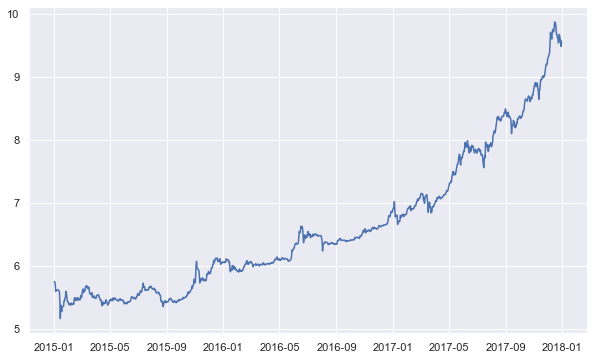

In [158]:
bitcoints_log = np.log(ts)
plt.plot(bitcoints_log)

In [159]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, windowroll = 12, cutoff = 0.05):    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() # 24 hours on each day
    rolstd  = bitcoints_log.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std  = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    pvalue = dftest[1]
    if pvalue <= cutoff:
        print('p-value = '+ str(pvalue) + ' The series '+ timeseries.name + ' is likely stationary.')
        #return True
    else:
        print('p-value = '+ str(pvalue) + ' The series '+ timeseries.name + ' is likely non-stationary.')
        #return False
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
        
    print (dfoutput)

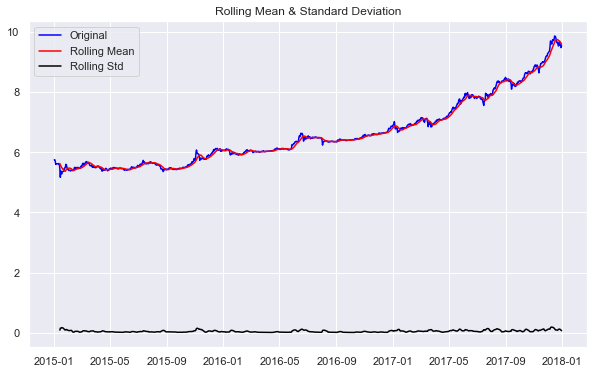

Results of Dickey-Fuller Test:
p-value = 0.9989929030431773 The series price_usd is likely non-stationary.
Test Statistic                    2.365053
p-value                           0.998993
#Lags Used                        0.000000
Number of Observations Used    1092.000000
Critical Value (1%)              -3.436353
Critical Value (5%)              -2.864190
Critical Value (10%)             -2.568181
dtype: float64


In [160]:
#LMV = bitcoin2.dropna(inplace=True)
test_stationarity(bitcoints_log)

# Result = Data not stationary

# Making data stationary

# Moving Average

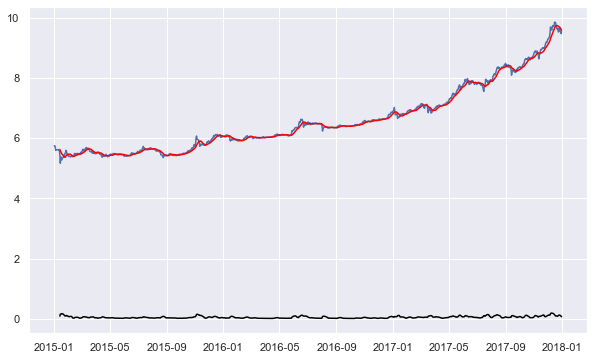

In [161]:
bitcoin_moving_avg  = pd.Series(bitcoints_log).rolling(window=12).mean()
bitcoin_rolling_std = pd.Series(bitcoints_log).rolling(window = 12).std()
plt.plot(bitcoints_log)
plt.plot(bitcoin_rolling_std, color='black')
plt.plot(bitcoin_moving_avg, color='red')

In [162]:
bitcoints_log_moving_avg_diff = bitcoints_log - bitcoin_moving_avg
bitcoints_log_moving_avg_diff.head(12)

date
2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-10         NaN
2015-01-11         NaN
2015-01-12         NaN
2015-01-13   -0.190748
Name: price_usd, dtype: float64

# Stationarity

# Function

In [163]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, windowroll = 12, cutoff = 0.05):    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() # 24 hours on each day
    rolstd  = bitcoints_log.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std  = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    pvalue = dftest[1]
    if pvalue <= cutoff:
        print('p-value = '+ str(pvalue) + ' The series '+ timeseries.name + ' is likely stationary.')
        #return True
    else:
        print('p-value = '+ str(pvalue) + ' The series '+ timeseries.name + ' is likely non-stationary.')
        #return False
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
        
    print (dfoutput)

# Dropping the NANs

# Data after differencing

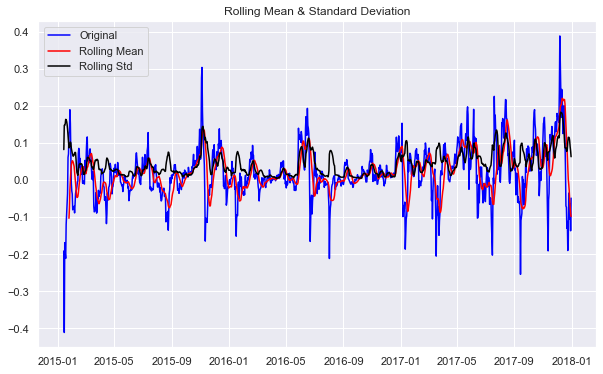

Results of Dickey-Fuller Test:
p-value = 8.535436446055953e-17 The series price_usd is likely stationary.
Test Statistic                -9.740213e+00
p-value                        8.535436e-17
#Lags Used                     1.000000e+00
Number of Observations Used    1.080000e+03
Critical Value (1%)           -3.436419e+00
Critical Value (5%)           -2.864220e+00
Critical Value (10%)          -2.568197e+00
dtype: float64


In [164]:
LMV = bitcoints_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(bitcoints_log_moving_avg_diff)

# Test statistics < (5%) critical values & p value . Data is relatively stationary

# Eliminating trend & seasonality

# Decomposition

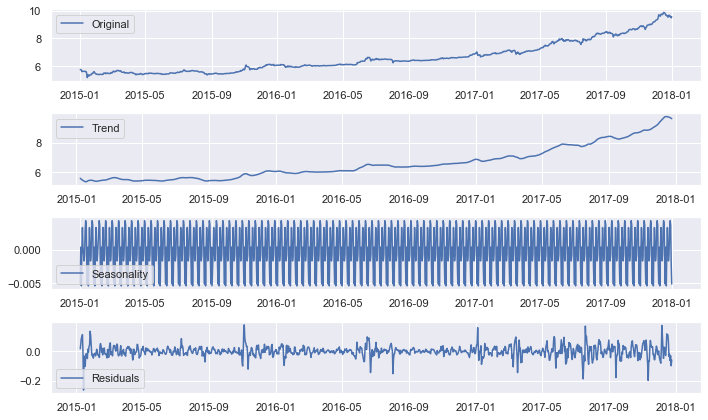

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
bitcoin_decomposition = seasonal_decompose(bitcoints_log, period =12 )

trend    = bitcoin_decomposition.trend
seasonal = bitcoin_decomposition.seasonal
residual = bitcoin_decomposition.resid

plt.subplot(411)
plt.plot(bitcoints_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# stationarity of residuals

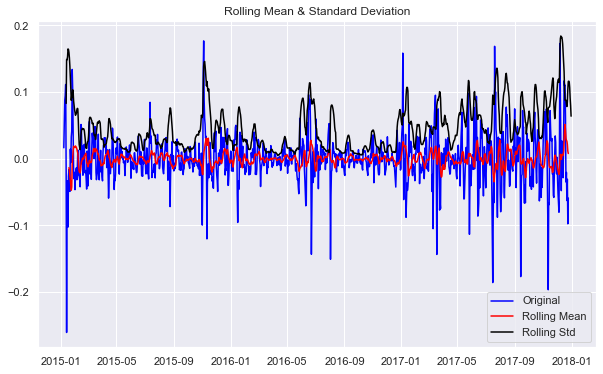

Results of Dickey-Fuller Test:
p-value = 2.2643012941860433e-24 The series resid is likely stationary.
Test Statistic                -1.303875e+01
p-value                        2.264301e-24
#Lags Used                     1.400000e+01
Number of Observations Used    1.066000e+03
Critical Value (1%)           -3.436499e+00
Critical Value (5%)           -2.864255e+00
Critical Value (10%)          -2.568216e+00
dtype: float64


In [166]:
bitcoints_log_decompose = residual
bitcoints_log_decompose.dropna(inplace=True)
test_stationarity(bitcoints_log_decompose)

# Test statistics < (1%) of critical values & P value <5

# Residuals also Stationary

# Forecasting for all Data using original dataset

# Splitting data & visualizing it

In [169]:
bitcoints_log.head()

date
2015-01-01 00:00:00    5.754792
2015-01-02 00:00:00    5.756217
2015-01-03 00:00:00    5.711519
2015-01-04 00:00:00     5.60186
2015-01-05 00:00:00    5.623295
Name: price_usd, dtype: object

# Training data until 2017-08
Testing Data on 2017-09, 2017-10, 2017-11, 2017 12

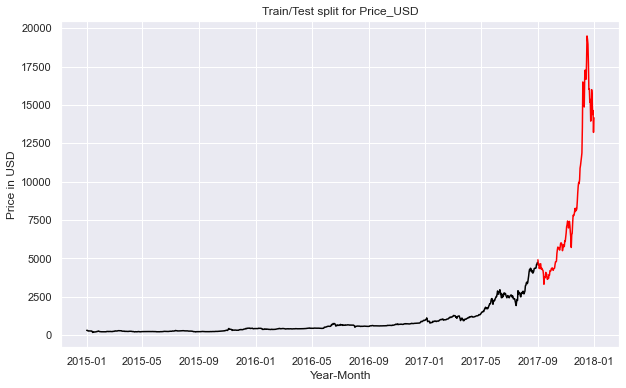

In [177]:
import seaborn as sns

bitcoin2['date'] = bitcoin2.index

train = bitcoin2[bitcoin2['date'] < pd.to_datetime("2017-09", format='%Y-%m')]
train['train'] = train['price_usd']
del train['date']
del train['price_usd']

test = bitcoin2[bitcoin2['date'] >= pd.to_datetime("2017-09", format='%Y-%m')]
del test['date']
test['test'] = test['price_usd']
del test['price_usd']

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Price_USD")
plt.ylabel("Price in USD")
plt.xlabel('Year-Month')
sns.set()
plt.show()

# optimal P, D, Q for training data via AUTO-ARIMA

In [178]:
#pip install pmdarima

In [187]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
# forecast = model.predict(n_periods=len(test))
# forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11027.726, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=10653.526, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=10322.355, Time=0.22 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=10320.682, Time=0.26 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=10316.307, Time=0.46 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=10546.331, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=10317.847, Time=1.50 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=10320.435, Time=0.43 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=10525.553, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=10316.532, Time=0.91 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 5.580 seconds


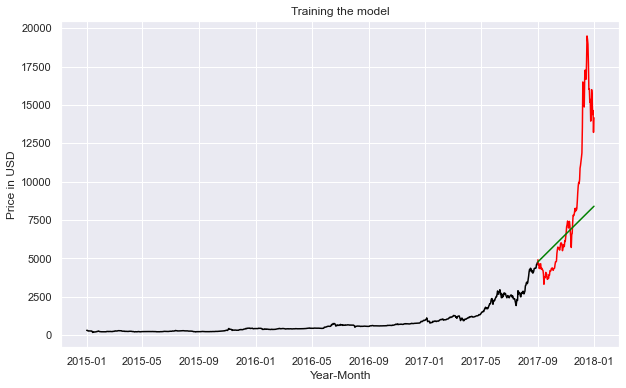

In [182]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title("Training the model")
plt.ylabel("Price in USD")
plt.xlabel('Year-Month')
sns.set()
plt.show()

# RMSE

In [181]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  3958.1678170114815


# Optimal P D Q for the data

In [188]:
stepwise_fit = auto_arima(bitcoin2['price_usd'], seasonal = True, trace = True, m=1)  

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=14668.900, Time=1.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=15262.884, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=15138.529, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=1.37 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=14669.831, Time=1.36 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=1.60 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=1.18 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=14668.253, Time=1.54 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=14877.842, Time=0.12 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.29 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=15006.559, Time=0.05 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=14722.146, Time=0.1

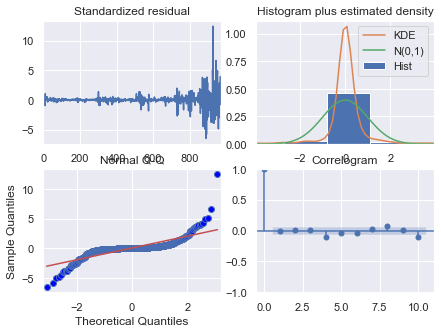

In [184]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [185]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(3, 2, 1)   Log Likelihood               -7329.127
Date:                Fri, 03 Dec 2021   AIC                          14668.253
Time:                        20:00:13   BIC                          14693.227
Sample:                             0   HQIC                         14677.705
                               - 1093                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1790      0.008     23.393      0.000       0.164       0.194
ar.L2         -0.1499      0.008    -17.692      0.000      -0.167      -0.133
ar.L3         -0.0348      0.010     -3.335      0.001      -0.055      -0.014
ma.L1         -0.9894      0.001   -782.660      0.000      -0.992      -0.987
sigma2       3.99e+04    355.710    112.184      0.000    3.92e+04    4.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            159712.08
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):            1184.85   Skew:                             1.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# AIC and RMSE are inter-related but they represent different objectives in choosing the best model.

RMSE/MAPE are measures of error and disregards the "complexity" of the model. Optimizing for RMSE/MAPE can give you accurate results, but could lead to overly complex model that captures too much noise in the data, otherwise known as overfitting.

This is where AIC/AICc and their relative BIC comes in. They take the error term and add a penalty related to the number of predictors used in the model, such that more complex models are less favorable and allows you to strike a balance between a complex but accurate model, vs a simpler but still reasonably accurate model.

It ultimately comes down to the purpose of your model. If having the most accurate prediction matters then you might simply look at RMSE/MAPE, but if you need a model that is more interpretable/explainable then you might want to consider AICc which better balances complexity and accuracy.


# Model 1 using December only

In [283]:
len(bitcoin2['2016-12-01': '2016-12-31'])

31

In [284]:
train = bitcoin2['2016-12'].iloc[:31]
test  = bitcoin2['2017'].iloc[:]

In [285]:
train.head()

,price_usd,date
date,,
2016-12-01,752.246125,2016-12-01
2016-12-02,772.437250,2016-12-02
2016-12-03,764.339625,2016-12-03
2016-12-04,764.816250,2016-12-04
2016-12-05,754.639750,2016-12-05


In [286]:
test.head()

,price_usd,date
date,,
2017-01-01,997.729875,2017-01-01
2017-01-02,1015.977113,2017-01-02
2017-01-03,1023.141875,2017-01-03
2017-01-04,1126.763338,2017-01-04
2017-01-05,994.674875,2017-01-05


In [287]:
model_1 = SARIMAX(train['price_usd'], order = (2,2,1), seasonal_order=(2,2,1,12))
results = model_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          price_usd   No. Observations:                   31
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood                   0.000
Date:                            Fri, 03 Dec 2021   AIC                             14.000
Time:                                    20:59:41   BIC                             11.266
Sample:                                12-01-2016   HQIC                             6.662
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1057   9.84e-31  -1.07e+29      0.000      -0.106      -0.106
ar.L2         -0.4506   2.36e-30  -1.91e+29      0.000      -0.451      -0.451
ma.L1         -0.2919   1.39e-30   -2.1e+29      0.000      -0.292      -0.292
ar.S.L12     1.73e-08    1.4e-32   1.24e+24      0.000    1.73e-08    1.73e-08
ar.S.L24    3.703e-10   1.64e-34   2.26e+24      0.000     3.7e-10     3.7e-10
ma.S.L12   -6.722e-09    1.4e-32   -4.8e+23      0.000   -6.72e-09   -6.72e-09
sigma2      2.339e-11   4.52e-20   5.17e+08      0.000    2.34e-11    2.34e-11
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                 1.88
Prob(Q):                               nan   Prob(JB):                         0.39
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+45. Standard errors may be unstable.
"""

In [288]:
start = len(train)
end = len(train) + len(test) - 1

predictions_1 = results.predict(start=start, end=end, typ ='levels').rename('SARIMA(2,2,1)(2,2,1,12) Prediction_1')

In [289]:
predictions_1.tail()

2017-12-27    2.424571e+06
2017-12-28    2.444316e+06
2017-12-29    2.464134e+06
2017-12-30    2.484353e+06
2017-12-31    2.502531e+06
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Prediction_1, dtype: float64

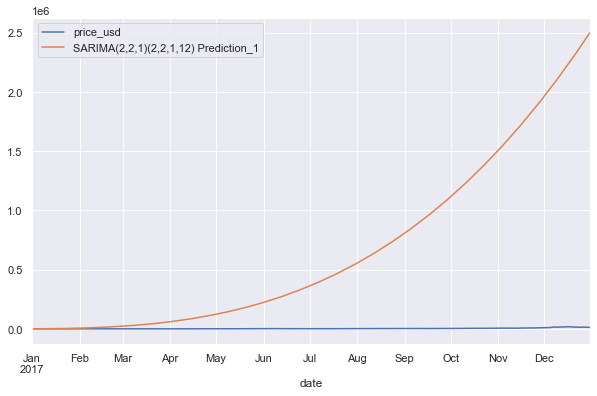

In [290]:
test['price_usd'].plot(legend = True)
predictions_1.plot(legend = True);

In [291]:
growth1 = (predictions_1+1)/predictions_1

growth1

2017-01-01    1.000860
2017-01-02    1.000792
2017-01-03    1.000730
2017-01-04    1.000669
2017-01-05    1.000665
                ...   
2017-12-27    1.000000
2017-12-28    1.000000
2017-12-29    1.000000
2017-12-30    1.000000
2017-12-31    1.000000
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Prediction_1, Length: 365, dtype: float64

In [292]:
# Compare predictions to expected values
for i in range(len(predictions_1)):
    print(f"predicted={predictions_1[i]:<11.10}, expected={test['price_usd'][i]}, growth={growth1[i]}")

predicted=1163.3439  , expected=997.729875, growth=1.0008595910461215
predicted=1263.12225 , expected=1015.977113, growth=1.0007916890071409
predicted=1370.330125, expected=1023.141875, growth=1.0007297511612394
predicted=1494.6841  , expected=1126.763338, growth=1.0006690376916434
predicted=1504.388225, expected=994.674875, growth=1.0006647220334366
predicted=1531.29625 , expected=883.099175, growth=1.000653041499971
predicted=1593.581875, expected=896.830375, growth=1.0006275171773023
predicted=1728.79995 , expected=908.1490375, growth=1.0005784359260306
predicted=1855.75275 , expected=894.18025, growth=1.000538864889194
predicted=2010.9745  , expected=906.0569143, growth=1.0004972713477969
predicted=2119.569125, expected=785.2237375, growth=1.0004717940020003
predicted=2217.39135 , expected=803.372375, growth=1.000450980382872
predicted=2334.320537, expected=826.2956625, growth=1.0004283901820403
predicted=2540.567562, expected=817.912875, growth=1.000393612834691
predicted=2756.421

# Evaluate Model 1

In [293]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['price_usd'], predictions_1)
print(f'SARIMA(2,2,1)(2,2,1,12) MSE Error: {error:11.10}')

SARIMA(2,2,1)(2,2,1,12) MSE Error: 9.423218675e+11


In [294]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['price_usd'], predictions_1)
print(f'SARIMA(2,2,1)(2,2,1,12) RMSE Error: {error:11.10}')

SARIMA(2,2,1)(2,2,1,12) RMSE Error: 970732.6447


# RMSE IS > MSE

# Forecasting for 2018

In [295]:
bitcoin2 = bitcoin2.asfreq('D')

In [296]:
model_1 = SARIMAX(bitcoin2['price_usd'], order = (2,2,1), seasonal_order = (2,2,1,12)) 

In [297]:
results = model_1.fit()

In [298]:
fcast_1 = results.predict(len(bitcoin2.index),
                          len(bitcoin2.index)+365,typ='levels').rename('SARIMA(2,2,1)(2,2,1,12) Forecast')

In [299]:
fcast_1

2018-01-01    14204.081077
2018-01-02    14168.579448
2018-01-03    14016.910319
2018-01-04    14745.896186
2018-01-05    14837.950845
                  ...     
2018-12-28    40757.835799
2018-12-29    40197.151767
2018-12-30    41239.229080
2018-12-31    40759.391997
2019-01-01    40849.763893
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Forecast, Length: 366, dtype: float64

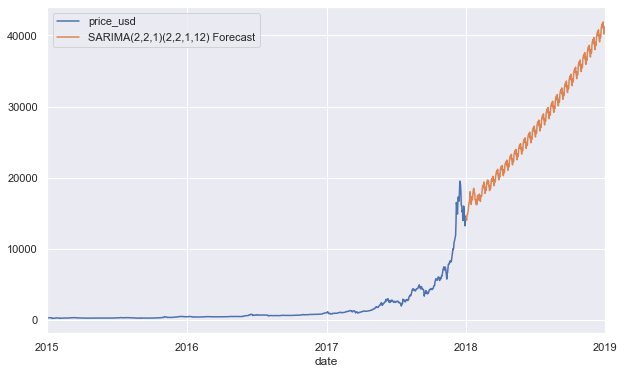

In [300]:
bitcoin2['price_usd'].plot(legend = True)
fcast_1.plot(legend = True);

# Model 2# using 3 months

In [301]:
bitcoin2 = bitcoin2.asfreq('D')

In [302]:
len(bitcoin2['2016-10-01': '2016-12-31'])

92

In [303]:
train = bitcoin2['2016-10':'2016-12-31'].iloc[:92]
test  = bitcoin2['2017'].iloc[:]

In [304]:
train.head()

,price_usd,date
date,,
2016-10-01,614.823800,2016-10-01
2016-10-02,610.518913,2016-10-02
2016-10-03,611.851100,2016-10-03
2016-10-04,609.624812,2016-10-04
2016-10-05,612.352287,2016-10-05


In [305]:
train.tail()

,price_usd,date
date,,
2016-12-27,930.376000,2016-12-27
2016-12-28,967.480375,2016-12-28
2016-12-29,963.381625,2016-12-29
2016-12-30,952.156375,2016-12-30
2016-12-31,959.879875,2016-12-31


In [306]:
test

,price_usd,date
date,,
2017-01-01,997.729875,2017-01-01
2017-01-02,1015.977113,2017-01-02
2017-01-03,1023.141875,2017-01-03
2017-01-04,1126.763338,2017-01-04
2017-01-05,994.674875,2017-01-05
...,...,...
2017-12-27,15589.321670,2017-12-27
2017-12-28,14380.581670,2017-12-28
2017-12-29,14640.140000,2017-12-29


In [307]:
model_2 = SARIMAX(train['price_usd'], order = (2,2,1), seasonal_order=(2,2,1,12))
results = model_2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          price_usd   No. Observations:                   92
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood                -300.303
Date:                            Fri, 03 Dec 2021   AIC                            614.606
Time:                                    21:03:00   BIC                            629.934
Sample:                                10-01-2016   HQIC                           620.663
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0690      0.120      0.576      0.564      -0.166       0.303
ar.L2         -0.2800      0.180     -1.556      0.120      -0.633       0.073
ma.L1         -0.9982      1.026     -0.973      0.331      -3.009       1.012
ar.S.L12      -1.5172      0.189     -8.042      0.000      -1.887      -1.147
ar.S.L24      -0.8410      0.068    -12.313      0.000      -0.975      -0.707
ma.S.L12       0.9995    335.618      0.003      0.998    -656.800     658.799
sigma2       277.5888   9.31e+04      0.003      0.998   -1.82e+05    1.83e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.56   Prob(JB):                         0.15
Heteroskedasticity (H):               0.86   Skew:                             0.21
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [308]:
start = len(train)
end = len(train) + len(test) - 1

predictions_2 = results.predict(start=start, end=end, typ='levels').rename('SARIMA(2,2,1)(2,2,1,12) Prediction_2')

In [309]:
predictions_2

2017-01-01      972.854354
2017-01-02      978.756766
2017-01-03     1024.332165
2017-01-04     1075.552122
2017-01-05     1060.139642
                  ...     
2017-12-27    93769.304712
2017-12-28    94536.080064
2017-12-29    95562.662858
2017-12-30    96761.394086
2017-12-31    96913.807726
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Prediction_2, Length: 365, dtype: float64

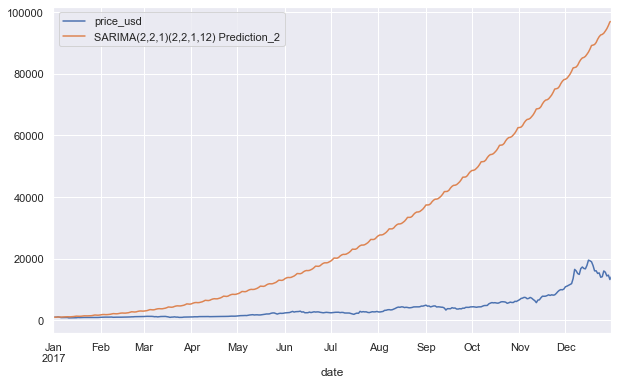

In [310]:
test['price_usd'].plot(legend = True)
predictions_2.plot(legend = True);

In [311]:
growth2 = (predictions_2+1)/predictions_2

In [312]:
growth2

2017-01-01    1.001028
2017-01-02    1.001022
2017-01-03    1.000976
2017-01-04    1.000930
2017-01-05    1.000943
                ...   
2017-12-27    1.000011
2017-12-28    1.000011
2017-12-29    1.000010
2017-12-30    1.000010
2017-12-31    1.000010
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Prediction_2, Length: 365, dtype: float64

In [313]:
# Compare predictions to expected values
for i in range(len(predictions_2)):
    print(f"predicted={predictions_2[i]:<11.10}, expected={test['price_usd'][i]}, growth={growth2[i]}")

predicted=972.8543539, expected=997.729875, growth=1.0010279030936151
predicted=978.7567662, expected=1015.977113, growth=1.0010217043034189
predicted=1024.332165, expected=1023.141875, growth=1.000976245825114
predicted=1075.552122, expected=1126.763338, growth=1.000929755034484
predicted=1060.139642, expected=994.674875, growth=1.0009432719617384
predicted=1044.350649, expected=883.099175, growth=1.0009575327988662
predicted=1072.355108, expected=896.830375, growth=1.0009325269143508
predicted=1116.488869, expected=908.1490375, growth=1.0008956649974123
predicted=1141.768968, expected=894.18025, growth=1.0008758339275283
predicted=1152.686236, expected=906.0569143, growth=1.0008675387705952
predicted=1130.937609, expected=785.2237375, growth=1.0008842220759717
predicted=1128.467048, expected=803.372375, growth=1.0008861579091666
predicted=1153.698904, expected=826.2956625, growth=1.0008667772817639
predicted=1205.079541, expected=817.912875, growth=1.0008298207426307
predicted=1268.6

# Evaluate Model 2

In [314]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['price_usd'], predictions_2)
print(f'SARIMA(2,2,1)(2,2,1,12) MSE Error: {error:11.10}')

SARIMA(2,2,1)(2,2,1,12) MSE Error: 1.220731337e+09


In [315]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['price_usd'], predictions_2)
print(f'SARIMA(2,2,1)(2,2,1,12) RMSE Error: {error:11.10}')

SARIMA(2,2,1)(2,2,1,12) RMSE Error: 34938.96589


# RMSE > MSE

# Forecasting from 3 months

In [316]:
model_2 = SARIMAX(bitcoin2['price_usd'], order = (2,2,1), seasonal_order = (2,2,1,12))

In [317]:
results = model_2.fit()

In [318]:
fcast_2 = results.predict(len(bitcoin),len(bitcoin)+365,typ='levels').rename('SARIMA(2,2,1)(2,2,1,12) Forecast')

In [319]:
fcast_2

2017-12-29    14054.794484
2017-12-30    15616.492144
2017-12-31    13813.304318
2018-01-01    14204.081077
2018-01-02    14168.579448
                  ...     
2018-12-25    41128.316689
2018-12-26    41901.991883
2018-12-27    40975.083143
2018-12-28    40757.835799
2018-12-29    40197.151767
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Forecast, Length: 366, dtype: float64

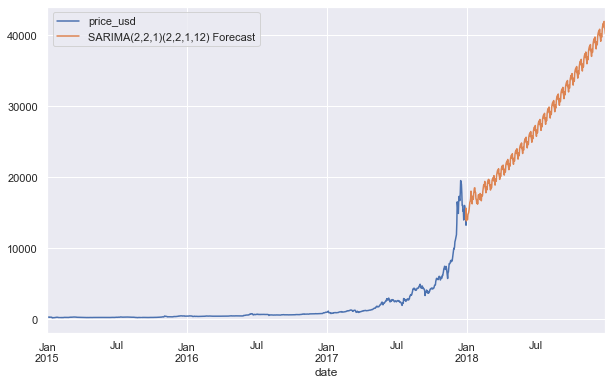

In [320]:
bitcoin2['price_usd'].plot(legend = True)
fcast_2.plot(legend = True);

# Model#3 Training on all data

In [321]:
bitcoin2 = bitcoin2.asfreq('D')

In [322]:
len(bitcoin2['2015-01-01': '2017-06-30'])

912

In [323]:
train = bitcoin2['2015-01':'2017-06'].iloc[:912]
test  = bitcoin2['2017-07':'2017-12'].iloc[:]

In [324]:
train.head()

,price_usd,date
date,,
2015-01-01,315.70,2015-01-01
2015-01-02,316.15,2015-01-02
2015-01-03,302.33,2015-01-03
2015-01-04,270.93,2015-01-04
2015-01-05,276.80,2015-01-05


In [325]:
train.tail()

,price_usd,date
date,,
2017-06-26,2436.451057,2017-06-26
2017-06-27,2517.903114,2017-06-27
2017-06-28,2585.349186,2017-06-28
2017-06-29,2544.414475,2017-06-29
2017-06-30,2477.641375,2017-06-30


In [326]:
test.head()

,price_usd,date
date,,
2017-07-01,2434.077863,2017-07-01
2017-07-02,2501.191343,2017-07-02
2017-07-03,2561.225429,2017-07-03
2017-07-04,2599.729838,2017-07-04
2017-07-05,2619.187503,2017-07-05


In [327]:
test.tail()

,price_usd,date
date,,
2017-12-27,15589.32167,2017-12-27
2017-12-28,14380.58167,2017-12-28
2017-12-29,14640.14000,2017-12-29
2017-12-30,13215.57400,2017-12-30
2017-12-31,14165.57500,2017-12-31


# Fit the model

In [328]:
model_3 = SARIMAX(train['price_usd'], order = (2,2,1), seasonal_order=(2,2,1,12))
results = model_3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          price_usd   No. Observations:                  912
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -4520.230
Date:                            Fri, 03 Dec 2021   AIC                           9054.460
Time:                                    21:08:11   BIC                           9087.967
Sample:                                01-01-2015   HQIC                          9067.269
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0863      0.013     -6.456      0.000      -0.112      -0.060
ar.L2          0.0129      0.012      1.052      0.293      -0.011       0.037
ma.L1         -0.9997      0.054    -18.528      0.000      -1.105      -0.894
ar.S.L12      -0.5960      0.022    -27.110      0.000      -0.639      -0.553
ar.S.L24      -0.4301      0.026    -16.581      0.000      -0.481      -0.379
ma.S.L12      -0.9998      1.980     -0.505      0.614      -4.881       2.882
sigma2      1455.1824   2895.992      0.502      0.615   -4220.858    7131.222
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18101.82
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              29.48   Skew:                            -2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [329]:
start = len(train)
end = len(train) + len(test) - 1

predictions_3 = results.predict(start=start, 
                                end=end, typ='levels').rename('SARIMA(2,2,1)(2,2,1,12) Prediction_3')

In [330]:
predictions_3

2017-07-01    2409.251978
2017-07-02    2401.692679
2017-07-03    2449.701753
2017-07-04    2512.193153
2017-07-05    2508.605374
                 ...     
2017-12-27    1525.014177
2017-12-28    1462.881862
2017-12-29    1534.226538
2017-12-30    1532.694504
2017-12-31    1591.201877
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Prediction_3, Length: 184, dtype: float64

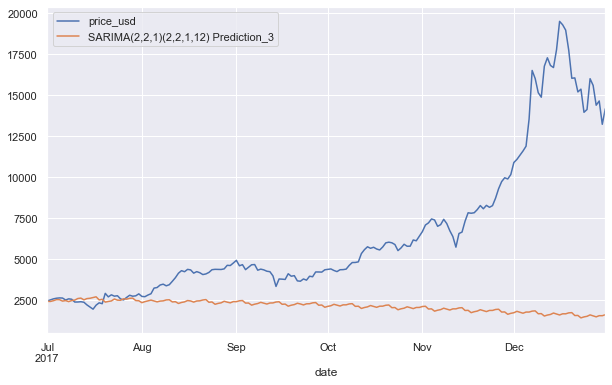

In [331]:
test['price_usd'].plot(legend = True)
predictions_3.plot(legend = True);

In [332]:
growth3 = (predictions_3+1)/predictions_3

In [333]:
growth3

2017-07-01    1.000415
2017-07-02    1.000416
2017-07-03    1.000408
2017-07-04    1.000398
2017-07-05    1.000399
                ...   
2017-12-27    1.000656
2017-12-28    1.000684
2017-12-29    1.000652
2017-12-30    1.000652
2017-12-31    1.000628
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Prediction_3, Length: 184, dtype: float64

In [334]:
# Compare predictions to expected values
for i in range(len(predictions_3)):
    print(f"predicted={predictions_3[i]:<11.10}, expected={test['price_usd'][i]}, growth={growth3[i]}")

predicted=2409.251978, expected=2434.077863, growth=1.0004150665887521
predicted=2401.692679, expected=2501.191343, growth=1.0004163730059175
predicted=2449.701753, expected=2561.225429, growth=1.0004082129584466
predicted=2512.193153, expected=2599.729838, growth=1.0003980585644439
predicted=2508.605374, expected=2619.187503, growth=1.0003986278632186
predicted=2424.430527, expected=2609.96775, growth=1.000412467995635
predicted=2456.681404, expected=2491.201214, growth=1.000407053189114
predicted=2392.117829, expected=2562.130663, growth=1.0004180396082496
predicted=2459.12961 , expected=2536.238938, growth=1.0004066479440805
predicted=2485.956367, expected=2366.170143, growth=1.0004022596749704
predicted=2582.466042, expected=2369.862129, growth=1.0003872267762257
predicted=2606.718824, expected=2385.748571, growth=1.0003836240375703
predicted=2501.701301, expected=2354.783417, growth=1.000399727976988
predicted=2577.728039, expected=2190.947833, growth=1.0003879385198142
predicted=

# Evaluate Model#3

In [335]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['price_usd'], predictions_3)
print(f'SARIMA(2,2,1)(2,2,1,12) MSE Error: {error:11.10}')

SARIMA(2,2,1)(2,2,1,12) MSE Error:  40945739.3


In [336]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['price_usd'], predictions_3)
print(f'SARIMA(2,2,1)(2,2,1,12) RMSE Error: {error:11.10}')

SARIMA(2,2,1)(2,2,1,12) RMSE Error: 6398.885785


# RMSE<MSE

# Forecasting from training on entire dataset

In [337]:
model_3 = SARIMAX(bitcoin2['price_usd'], order = (2,2,1), seasonal_order = (2,2,1,12))

In [338]:
results = model_3.fit()

In [339]:
fcast_3 = results.predict(len(bitcoin),len(bitcoin)+365,typ='levels').rename('SARIMA(2,2,1)(2,2,1,12) Forecast')

In [340]:
fcast_3

2017-12-29    14054.794484
2017-12-30    15616.492144
2017-12-31    13813.304318
2018-01-01    14204.081077
2018-01-02    14168.579448
                  ...     
2018-12-25    41128.316689
2018-12-26    41901.991883
2018-12-27    40975.083143
2018-12-28    40757.835799
2018-12-29    40197.151767
Freq: D, Name: SARIMA(2,2,1)(2,2,1,12) Forecast, Length: 366, dtype: float64

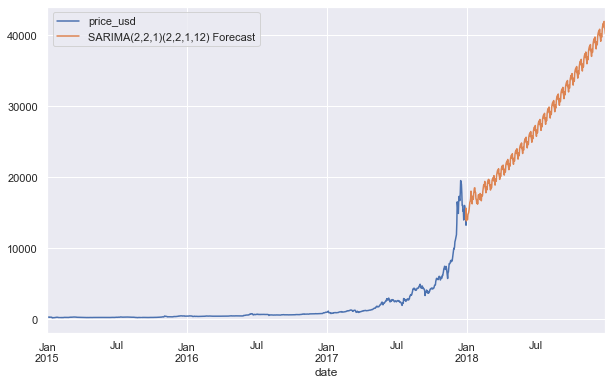

In [341]:
bitcoin2['price_usd'].plot(legend = True)
fcast_3.plot(legend = True);